In [1]:
library(Seurat)
library(SeuratData)
library(SeuratWrappers)
library(ggplot2)
library(patchwork)
library(dplyr)
library(qs)
library(glue)
library(tidyverse)
library(ggpubr)
library(cowplot)
library("speckle")
library(RColorBrewer)
library(svs)
library(viridis)
library("readxl")
library(ggsignif)
library(lme4)
library(lmerTest)
library(tibble)
library(grDevices)

options(future.globals.maxSize = 3e+010)
options(Seurat.object.assay.version = "v5")
setwd("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.6

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is 

In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/a.garg/.local/share/r-miniconda/envs/seurat5_test/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Chicago
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lmerTest_3.1-3        lme4_1.1-35.1         Matrix_1.6-3         
 [4] ggsignif_0.6.4        readxl_1.4.3          viridis_0.6.4        
 [7] viridisLite_0.4.2     svs_3.0.0             RColorBr

In [13]:
obj1<- readRDS("~/knight_ADRC/Liger_integration/SCT_data/blurton_jhon_data_SCT.RDS")
obj2 <- readRDS("~/knight_ADRC/Liger_integration/SCT_data/knight_data_SCT.RDS")
obj3 <- readRDS("~/martin_Kampmann_data/martin_sct_data.RDS")

obj1<- UpdateSeuratObject(obj1)
obj2<- UpdateSeuratObject(obj2)
obj3<- UpdateSeuratObject(obj3)

DefaultAssay(obj1) <- "RNA"
DefaultAssay(obj2) <- "RNA"
DefaultAssay(obj3) <- "RNA" 

obj1@meta.data$batch <- "BJ"
obj2@meta.data$batch <- "KD"
obj3@meta.data$batch <- "MD"


# dataset1 
Idents(obj1) <- "Cell_type"
obj1_filtered <- subset(obj1, idents = c("Homeostatic", "DAM", "IFN", "IL1B","MHCII"))

# dataset2

Idents(obj2) -> obj2$Cell_type
obj2$Cell_type  <- ifelse(obj2$Cell_type==0,"mic0",
                          ifelse(obj2$Cell_type ==1,"mic1",
                                 ifelse(obj2$Cell_type ==2,"mic2",
                                        ifelse(obj2$Cell_type ==3,"mic3",
                                               ifelse(obj2$Cell_type==4,"mic4",
                                                      ifelse(obj2$Cell_type ==5,"mic5",
                                                             ifelse(obj2$Cell_type ==6,"mic6",
                                                                    ifelse(obj2$Cell_type ==7,"mic7","mic8"))))))))



table(obj2$Sample_ID) %>% as.data.frame() %>% filter(Freq > 10) -> list2  

Idents(obj2) <- "Sample_ID"

subset(x = obj2, idents = list2$Var1) -> obj2

Idents(obj2) <- "Cell_type"
obj2_filtered <- subset(obj2, idents = c("mic0", "mic1", "mic2", "mic3","mic4"))

# dataset3
obj3@meta.data$clusters_data ->obj3@meta.data$seurat_clusters

Idents(obj3) <- "Cell_type"
obj3_filtered <- subset(obj3, idents = c("Homeostatics","CCL13_Chemokine","Interferon","CXCL10_Interferon","Chemokine","SPP1+"))


# dataset4
ROSMAP_MIT_micro <- qread("~/integration_project/step_1/ROSMAP_MIT_micro_wd_correct_cell_type.qs",nthreads = 6)
ROSMAP_MIT_micro$batch <- "ROSMAP_MIT"

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘umap’

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“Assay integrated changing from Assay to Assay”
Warning message:
“Assay SCT changing from Assay to Assay”
Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in integrated

Updating slots in SCT

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

No assay information could be found for FindIntegrationAnchors

Warning message:
“Adding a command log without an assay associated with it”
No assay information could be found for PairwiseIntegrateReference

Warning message:
“Adding a command log with

In [14]:
obj1_mdata <- obj1_filtered@meta.data %>%
    dplyr::select(
        orig.ident,
        dataset,
        Sample_ID,
        batch,
        Cell_type
    )

obj2_mdata <- obj2_filtered@meta.data %>%
    dplyr::select(
        orig.ident,
        Sample_ID,
        Gender,
        PMI,
        AOD,
        Status,
        nAPOE,
        ADAD,
        batch,
        Cell_type
    )

obj3_mdata <- obj3_filtered@meta.data %>%
    dplyr::select(
        orig.ident,
        Sample_ID,
        clusters_data,
        batch,
        Cell_type
    )

ROSMAP_MIT_mdata <- ROSMAP_MIT_micro@meta.data %>%
    dplyr::select(
        orig.ident,
        subject,
        brainRegion,
        age_death,
        msex,
        pmi,
        ADdiag3types,
        batch,
        Cell_type
    )

prep_dataset <- function(counts, meta.data) {
    sobj <- CreateSeuratObject(counts, meta.data = meta.data)
    sobj <- NormalizeData(sobj)
    sobj <- FindVariableFeatures(sobj)
    sobj <- ScaleData(sobj)
    sobj <- RunPCA(sobj)
    sobj <- FindNeighbors(sobj, dims = 1:30, reduction = "pca")
    sobj <- FindClusters(sobj, resolution = 1)
    sobj <- RunUMAP(sobj, dims = 1:30)
    return(sobj)
}

obj1_new_sobj <- prep_dataset(obj1_filtered@assays$RNA, obj1_mdata)
obj2_new_sobj <- prep_dataset(obj2_filtered@assays$RNA, obj2_mdata)
obj3_new_sobj <- prep_dataset(obj3_filtered@assays$RNA, obj3_mdata)
ROSMAP_MIT_new <- prep_dataset(ROSMAP_MIT_micro@assays$RNA, ROSMAP_MIT_mdata)

obj1_new_sobj <- PercentageFeatureSet(obj1_new_sobj, "^MT-", col.name = "percent.mt")
obj2_new_sobj <- PercentageFeatureSet(obj2_new_sobj, "^MT-", col.name = "percent.mt")
obj3_new_sobj <- PercentageFeatureSet(obj3_new_sobj, "^MT-", col.name = "percent.mt")
ROSMAP_MIT_new <- PercentageFeatureSet(ROSMAP_MIT_new, "^MT-", col.name = "percent.mt")

obj1_new_sobj <- PercentageFeatureSet(obj1_new_sobj, "^RPS", col.name = "percent.rbs")
obj2_new_sobj <- PercentageFeatureSet(obj2_new_sobj, "^RPS", col.name = "percent.rbs")
obj3_new_sobj <- PercentageFeatureSet(obj3_new_sobj, "^RPS", col.name = "percent.rbs")
ROSMAP_MIT_new <- PercentageFeatureSet(ROSMAP_MIT_new, "^RPS", col.name = "percent.rbs")

Centering and scaling data matrix

PC_ 1 
Positive:  CST3, ABCG2, FOLR2, LINC00996, IL3RA, EGFL7, MRC1, IER3, ACY3, JAG1 
	   LYVE1, RHOB, MIR503HG, AL034397.3, SLC7A8, OLFML3, SFMBT2, LINC00671, IGF1, SUCNR1 
	   TLE4, PDK4, BIN1, USP53, RNASE6, ADGRG1, IFT74, IGSF21, CKB, LINC01736 
Negative:  ISG15, CXCL10, HLA-DRA, IFI44L, IFI6, HLA-DPA1, HLA-DRB1, MX2, IFIT3, MX1 
	   IFIT1, TYMP, LY6E, HLA-DPB1, IL4I1, IFITM3, CD74, BCL2A1, CD83, HLA-DRB5 
	   CCL3, GBP1, B2M, HLA-DMA, SPP1, IFI27, CD9, HLA-DQA2, CCL4, IRF7 
PC_ 2 
Positive:  CXCL10, CCL2, ISG15, MX1, IFI44L, IFIT3, IFIT1, MX2, CST3, IFI6 
	   IFITM3, IL1B, CCL8, IRF7, FOLR2, GPR84, EPSTI1, CCL4, IER3, IFIT2 
	   CCL4L2, XBP1, OAS3, ABCG2, LAP3, LY6E, XAF1, OASL, LINC00996, HERC5 
Negative:  CD9, HLA-DRA, HLA-DRB1, HLA-DPB1, HLA-DPA1, APOC1, CD74, HLA-DMA, HLA-DRB5, LGALS1 
	   HLA-DQB1, RAMP1, HLA-DQA2, PLA2G7, LIPA, ASAH1, NAP1L1, OLR1, FTL, TREM2 
	   FABP3, CXCR4, SCIN, PADI2, APOE, FABP5, LINC01235, HLA-DQA1, SPP1, LRRC39 
P

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25407
Number of edges: 542285

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7411
Number of communities: 9
Elapsed time: 3 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:59:30 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:59:30 Read 25407 rows and found 30 numeric columns

11:59:30 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:59:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:59:32 Writing NN index file to 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15726
Number of edges: 599648

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9044
Number of communities: 33
Elapsed time: 1 seconds


12:00:36 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:00:36 Read 15726 rows and found 30 numeric columns

12:00:36 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:00:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:00:38 Writing NN index file to temp file /tmp/RtmpgFpnpA/file288676f67c814

12:00:38 Searching Annoy index using 1 thread, search_k = 3000

12:00:42 Annoy recall = 100%

12:00:44 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:00:46 Initializing from normalized Laplacian +

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15350
Number of edges: 442741

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7283
Number of communities: 13
Elapsed time: 2 seconds


12:01:31 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:01:31 Read 15350 rows and found 30 numeric columns

12:01:31 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:01:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:01:32 Writing NN index file to temp file /tmp/RtmpgFpnpA/file28867302dd307

12:01:32 Searching Annoy index using 1 thread, search_k = 3000

12:01:37 Annoy recall = 100%

12:01:38 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:01:41 Initializing from normalized Laplacian +

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 166339
Number of edges: 3169592

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8203
Number of communities: 51
Elapsed time: 84 seconds


20 singletons identified. 31 final clusters.

12:07:22 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:07:22 Read 166339 rows and found 30 numeric columns

12:07:22 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:07:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:07:39 Writing NN index file to temp file /tmp/RtmpgFpnpA/file288677b24d55a

12:07:39 Searching Annoy index using 1 thread, search_k = 3000

12:08:49 Annoy recall = 100%

12:08:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12

In [17]:
table(ROSMAP_MIT_new$Cell_type)
table(obj1_new_sobj$Cell_type)
table(obj2_new_sobj$Cell_type)
table(obj3_new_sobj$Cell_type)


             Antiviral                Cycling             Glycolytic 
                  4643                   2136                   8071 
Homeostatic-ROSMAP_MIT         Inflammatory_I        Inflammatory_II 
                 43045                  29140                  14850 
      Inflammatory_III       Lipid_Processing  Neuronal_Surveillance 
                  2230                   1999                  29575 
            Phagocytic    Ribosome_Biogenesis       Stress_Signature 
                 14504                  11414                   4732 


        DAM Homeostatic         IFN        IL1B       MHCII 
       2090       15455        1872         661        5329 


mic0 mic1 mic2 mic3 mic4 
7027 3658 2080 1669 1292 


  CCL13_Chemokine         Chemokine CXCL10_Interferon      Homeostatics 
             3129               864              1256              3399 
       Interferon             SPP1+ 
             6318               384 

In [18]:
merge.s.obj <- merge(x = obj1_new_sobj, y = c(obj2_new_sobj, obj3_new_sobj, ROSMAP_MIT_new))
sobj_new <- CreateSeuratObject(
  counts = merge.s.obj@assays$RNA$counts, meta.data = merge.s.obj@meta.data
)

sobj_new[["RNA"]] <- split(sobj_new[["RNA"]], f = sobj_new$batch) 

 sobj_new <- SCTransform(
   sobj_new,
   vars.to.regress = c('nCount_RNA','nFeature_RNA','percent.mt'),
    verbose=TRUE
 )
 
sobj_new <- RunPCA(sobj_new, npcs = 30, verbose = F)
sobj_new <- FindNeighbors(sobj_new, dims = 1:30, reduction = "pca")
sobj_new <- FindClusters(sobj_new, resolution = 1, cluster.name = "unintegrated_clusters")
sobj_new <- RunUMAP(sobj_new, dims = 1:30, reduction = "pca", reduction.name = "umap.unintegrated")
qsave(sobj_new,"/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_unintegrated.qs" , nthreads = 6)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts.BJ

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 19667 by 25407

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trac

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 222822
Number of edges: 5669328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8528
Number of communities: 41
Elapsed time: 133 seconds


11 singletons identified. 30 final clusters.

13:59:05 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:59:05 Read 222822 rows and found 30 numeric columns

13:59:05 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:59:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:59:30 Writing NN index file to temp file /tmp/RtmpgFpnpA/file288674f400036

13:59:30 Searching Annoy index using 1 thread, search_k = 3000

14:01:12 Annoy recall = 100%

14:01:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14

In [19]:
table(sobj_new$Cell_type)


             Antiviral        CCL13_Chemokine              Chemokine 
                  4643                   3129                    864 
     CXCL10_Interferon                Cycling                    DAM 
                  1256                   2136                   2090 
            Glycolytic            Homeostatic Homeostatic-ROSMAP_MIT 
                  8071                  15455                  43045 
          Homeostatics                    IFN                   IL1B 
                  3399                   1872                    661 
        Inflammatory_I        Inflammatory_II       Inflammatory_III 
                 29140                  14850                   2230 
            Interferon       Lipid_Processing                  MHCII 
                  6318                   1999                   5329 
                  mic0                   mic1                   mic2 
                  7027                   3658                   2080 
                  m

In [21]:
sobj_new <- IntegrateLayers(
  object = sobj_new, method = CCAIntegration,
  orig.reduction = "pca", new.reduction = "integrated.cca",
  verbose = TRUE,
  normalization.method = "SCT"
)
message("done1..")

qsave(sobj_new,"/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer.qs" , nthreads = 6)

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 43907 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 40408 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 32409 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 99113 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 62086 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 58946 anchors

Merging dataset 2 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 4 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 4 2 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration ve

In [23]:
sobj_new

An object of class Seurat 
64798 features across 222822 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca

In [24]:
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer.qs" , nthreads = 6)

In [25]:
table(sobj_new$Cell_type)


             Antiviral        CCL13_Chemokine              Chemokine 
                  4643                   3129                    864 
     CXCL10_Interferon                Cycling                    DAM 
                  1256                   2136                   2090 
            Glycolytic            Homeostatic Homeostatic-ROSMAP_MIT 
                  8071                  15455                  43045 
          Homeostatics                    IFN                   IL1B 
                  3399                   1872                    661 
        Inflammatory_I        Inflammatory_II       Inflammatory_III 
                 29140                  14850                   2230 
            Interferon       Lipid_Processing                  MHCII 
                  6318                   1999                   5329 
                  mic0                   mic1                   mic2 
                  7027                   3658                   2080 
                  m

`summarise()` has grouped output by 'pc'. You can override using the `.groups`
argument.


pc metric       cor         
1  1  nCount_RNA   -0.108021675
2  1  nFeature_RNA -0.071703584
3  1  percent.mt   -0.222161168
4  10 nCount_RNA    0.202860875
5  10 nFeature_RNA  0.202052986
6  10 percent.mt   -0.136481305
7  11 nCount_RNA    0.027812316
8  11 nFeature_RNA  0.034606120
9  11 percent.mt   -0.044753063
10 12 nCount_RNA    0.127300808
11 12 nFeature_RNA  0.104961052
12 12 percent.mt   -0.049989261
13 13 nCount_RNA    0.084592727
14 13 nFeature_RNA  0.101184911
15 13 percent.mt   -0.141074570
16 14 nCount_RNA   -0.002327190
17 14 nFeature_RNA -0.023481574
18 14 percent.mt    0.048443133
19 15 nCount_RNA   -0.092793838
20 15 nFeature_RNA -0.101000457
21 15 percent.mt   -0.025880667
22 16 nCount_RNA   -0.027678802
23 16 nFeature_RNA -0.001094355
24 16 percent.mt   -0.060362192
25 17 nCount_RNA    0.035542607
26 17 nFeature_RNA  0.009793880
27 17 percent.mt    0.009623940
28 18 nCount_RNA   -0.080264736
29 18 nFeature_RNA -0.064099243
30 18 percent.mt   -0.016157126
⋮  ⋮  ⋮            ⋮           
61 28 nCount_RNA    0.142553503
62 28 nFeature_RNA  0.133708693
63 28 percent.mt    0.001892017
64 29 nCount_RNA    0.048862585
65 29 nFeature_RNA  0.041165659
66 29 percent.mt   -0.021394747
67 3  nCount_RNA    0.001209099
68 3  nFeature_RNA  0.002425596
69 3  percent.mt    0.013945788
70 30 nCount_RNA    0.076474146
71 30 nFeature_RNA  0.080070382
72 30 percent.mt    0.006296367
73 4  nCount_RNA    0.020356071
74 4  nFeature_RNA  0.007442923
75 4  percent.mt   -0.266356293
76 5  nCount_RNA   -0.008797536
77 5  nFeature_RNA  0.000159696
78 5  percent.mt   -0.452156145
79 6  nCount_RNA    0.015770349
80 6  nFeature_RNA  0.035573251
81 6  percent.mt   -0.078710129
82 7  nCount_RNA    0.022169326
83 7  nFeature_RNA  0.008121681
84 7  percent.mt   -0.268845272
85 8  nCount_RNA   -0.046994029
86 8  nFeature_RNA -0.063443082
87 8  percent.mt    0.403107726
88 9  nCount_RNA    0.055395985
89 9  nFeature_RNA  0.051825374
90 9  percent.mt    0.170005020

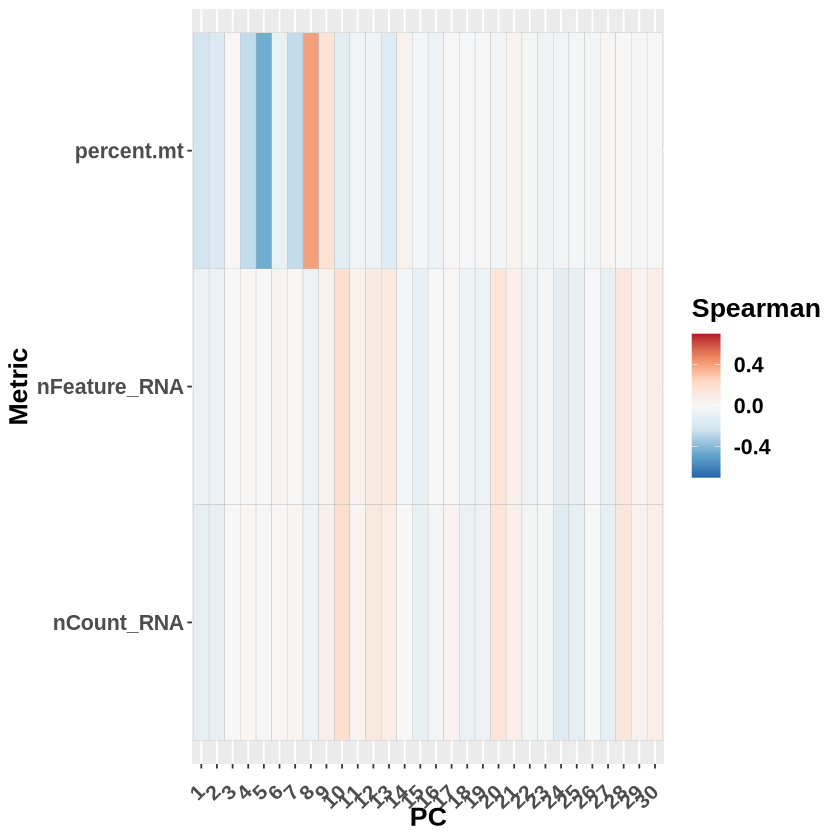

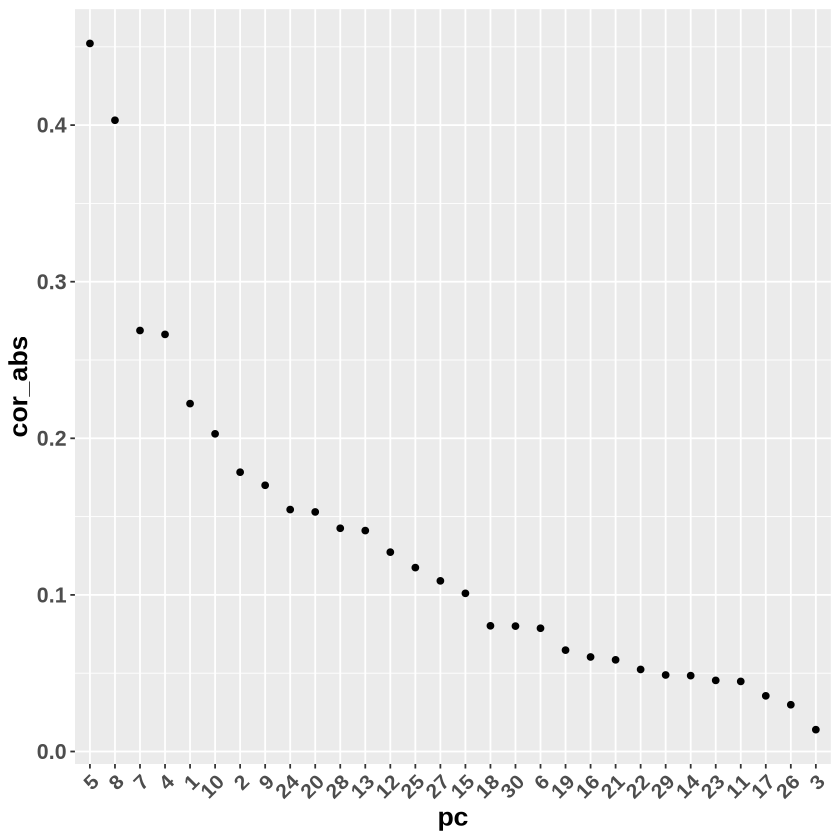

In [26]:
# PC vs features
sobj_new$barcode <- colnames(sobj_new)

pca_corr <- function(sobj) {
    emb <-
        Embeddings(sobj_new, reduction = "pca") %>% # use integrated.cca
        as.data.frame() %>%
        tibble::rownames_to_column("barcode") %>%
        left_join(sobj_new@meta.data, by = "barcode") %>%
        dplyr::select(nCount_RNA, nFeature_RNA, PC_1:PC_30, percent.mt, batch) %>%
        gather("pc", "pc_val", starts_with("PC_")) %>%
        gather("metric", "val_metric", nCount_RNA:nFeature_RNA, percent.mt) %>%
        group_by(pc, metric) %>%
        summarise(cor = cor(pc_val, val_metric, method = "s")) %>%
        mutate(pc = factor(gsub("PC_", "", pc), levels = 1:30))
}

emb <- pca_corr(sobj_new)
emb
# Plot correlations
emb %>%
    filter(metric != "DBL") %>%
    ggplot(aes(x = pc, y = metric, fill = cor)) +
    geom_tile(color = "gray") +
    scale_fill_distiller(palette = "RdBu", limits = c(-.7, .7)) +
    labs(x = "PC", y = "Metric", fill = "Spearman") +
    theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1))+
theme(axis.text.x = element_text(angle = 45, hjust = 1)) + theme(text = element_text(size = 16, face = "bold"))
ggsave("PC_corr_features1.png", device = "png", width = 10, height = 6, units = "in", bg = "white")

emb$cor_abs <- abs(emb$cor)
emb_max <- emb[complete.cases(emb), ] %>%
    group_by(pc) %>%
    slice_max(order_by = cor_abs)
emb_max$pc <- forcats::fct_reorder(emb_max$pc, emb_max$cor_abs, .desc = TRUE)
p1 <- ggplot(emb_max, aes(x = pc, y = cor_abs)) +
    geom_point(stat = "identity")

p1 + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + theme(text = element_text(size = 16, face = "bold"))

ggsave("PC_corr_features2.png", device = "png", width = 10, height = 6, units = "in", bg = "white")

`summarise()` has grouped output by 'pc'. You can override using the `.groups`
argument.


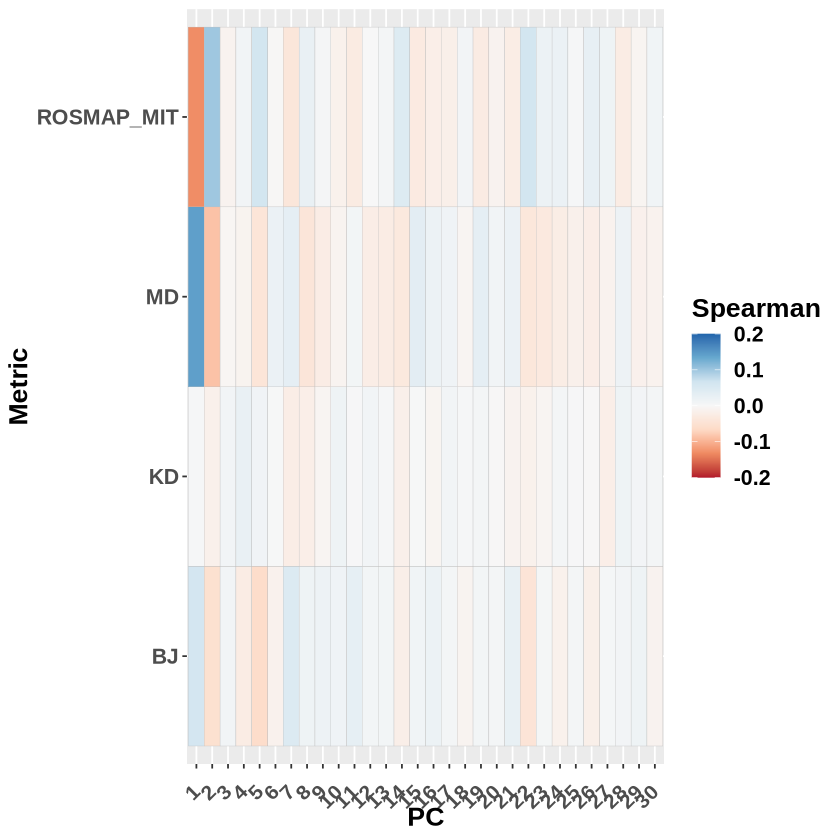

In [27]:
# batch vs. PCs

emb1 <-
    Embeddings(sobj_new, reduction = "integrated.cca") %>%
    as.data.frame() %>%
    tibble::rownames_to_column("barcode") %>%
    left_join(sobj_new@meta.data, by = "barcode") %>%
    {
        # One-hot encode sample IDs with model.matrix
        tmp <- model.matrix(~ -1 + ~batch, data = .)
        # Combine temporary object and output
        cbind(., tmp)
    } %>%
    dplyr::select(-batch) %>%
    dplyr::select(starts_with("batch"), starts_with("integratedcca_")) %>%
    gather("pc", "pc_val", starts_with("integratedcca_")) %>%
    gather("metric", "val_metric", starts_with("batch")) %>%
    group_by(pc, metric) %>%
    # summarise(cor = abs(cor(pc_val, val_metric, method = "s"))) %>%
    summarise(cor = (cor(pc_val, val_metric, method = "s"))) %>%
    mutate(pc = factor(gsub("integratedcca_", "", pc), levels = 1:50)) %>%
    mutate(metric = gsub("batch", "", metric))


p1 <- emb1 %>%
    ggplot(aes(x = pc, y = metric, fill = cor)) +
    geom_tile(color = "gray") +
    scale_fill_distiller(palette = "RdBu", limits = c(-0.2, .2), direction = 1) +
    labs(x = "PC", y = "Metric", fill = "Spearman") +
    theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1))

p1 + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + theme(text = element_text(size = 16, face = "bold"))
ggsave("PC_corr_batch.png", device = "png", width = 10, height = 6, units = "in", bg = "white")

`summarise()` has grouped output by 'pc'. You can override using the `.groups`
argument.


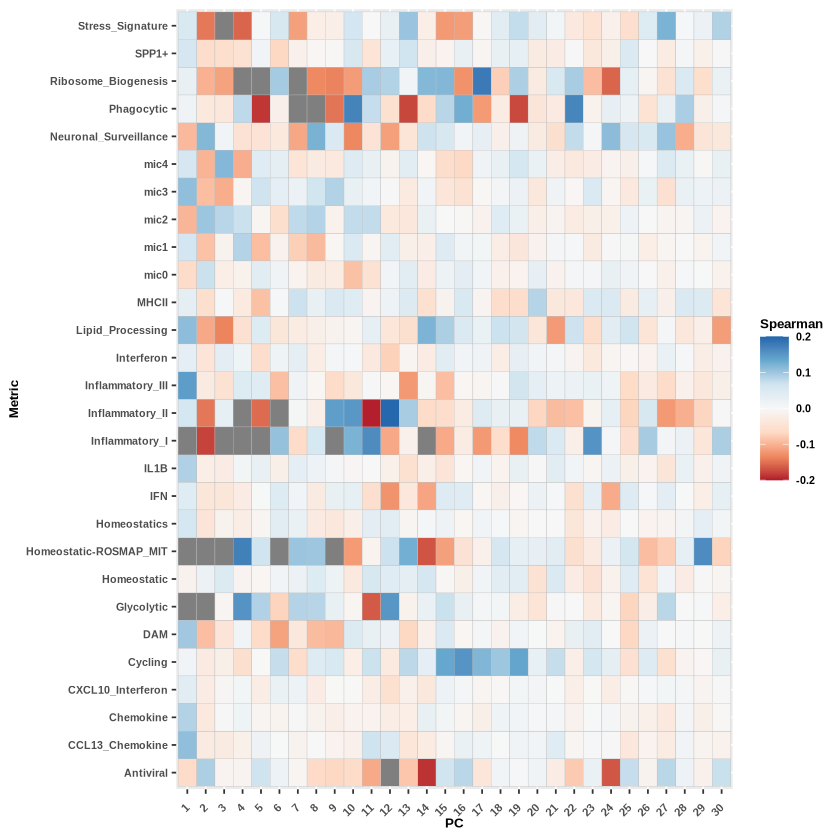

In [28]:
# cell type Vs PCs

emb1 <- 
  Embeddings(sobj_new, reduction = "integrated.cca") %>% 
  as.data.frame() %>% 
  tibble::rownames_to_column("barcode") %>% 
  left_join(sobj_new@meta.data, by = "barcode") %>% 
  {
    # One-hot encode sample IDs with model.matrix
    tmp <- model.matrix(~-1 + ~ Cell_type , data = .)
    # Combine temporary object and output
    cbind(., tmp)
  } %>% 
  dplyr::select(-Cell_type) %>% 
  dplyr::select(starts_with("Cell_type"), starts_with("integratedcca_")) %>% 
  gather("pc", "pc_val", starts_with("integratedcca_")) %>% 
  gather("metric","val_metric",starts_with("Cell_type")) %>% 
  group_by(pc, metric)  %>% 
  # summarise(cor = abs(cor(pc_val, val_metric, method = "s"))) %>% 
  summarise(cor = (cor(pc_val, val_metric, method = "s"))) %>% 
  mutate(pc = factor(gsub("integratedcca_", "", pc), levels = 1:50)) %>% 
    mutate(metric = gsub("Cell_type", "", metric))

  
  p1 <- emb1 %>% 
    ggplot(aes(x = pc, y = metric, fill = cor)) +
    geom_tile(color = "gray") +
    scale_fill_distiller(palette = "RdBu", limits = c(-0.2, .2), direction = 1) +
    labs(x = "PC", y = "Metric", fill = "Spearman") +
    theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1))
  
#p1$data$metric <- factor(as.character(p1$data$metric), levels = all_cell_type)

p1 +theme(axis.text.x = element_text(angle = 45, hjust = 1)) +theme(text = element_text(size = 8, face = "bold"))
ggsave("PC_corr_cell_type.png", device = "png", width = 16, height = 12, units = "in",bg ="white")

In [29]:
# excluding PC =1 that effect SPP1 of MD, other was also checked

 sobj_new <- FindNeighbors(sobj_new, reduction = "integrated.cca", dims = c(2:30))
 sobj_new <- FindClusters(sobj_new, resolution = 0.3, cluster.name = "cca_cluster")
 sobj_new <- RunUMAP(sobj_new, reduction = "integrated.cca", dims = c(2:30), reduction.name = "umap.cca")

Computing nearest neighbor graph



Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 222822
Number of edges: 5537782

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8811
Number of communities: 22
Elapsed time: 163 seconds


8 singletons identified. 14 final clusters.

14:57:36 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:57:36 Read 222822 rows and found 29 numeric columns

14:57:36 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:57:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:58:02 Writing NN index file to temp file /tmp/RtmpgFpnpA/file28867a8b83ea

14:58:02 Searching Annoy index using 1 thread, search_k = 3000

14:59:41 Annoy recall = 100%

14:59:45 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:5

In [30]:
# modify metadata a per need

sobj_new@meta.data <- sobj_new@meta.data[, !colnames(sobj_new@meta.data) %in% "percent.mt"]

sobj_new <- PercentageFeatureSet(sobj_new, "^MT-", col.name = "percent.mt")

sobj_new@meta.data <- sobj_new@meta.data[, !colnames(sobj_new@meta.data) %in% "percent.rp"]

sobj_new <- PercentageFeatureSet(sobj_new, "^RP[SL]", col.name = "percent.ribo")

sobj_new@meta.data <- unite(sobj_new@meta.data, col = "Sample.ID", c("Sample_ID", "subject"), na.rm = TRUE, sep = "")

sobj_new@meta.data <- sobj_new@meta.data[, !colnames(sobj_new@meta.data) %in% c("Sample_ID", "subject")]

#### # renamethe cell type
sobj <- subset(sobj_new, subset = batch == "MD")
sobj <- subset(sobj, subset = Cell_type == "Homeostatics")

if (all(colnames(sobj) %in% colnames(sobj_new))) {
    sobj_new$Cell_type[sobj_new$batch == "MD" & sobj_new$Cell_type == "Homeostatics"] <- "Homeostatic-MD"
}

sobj <- subset(sobj_new, subset = batch == "BJ")
sobj <- subset(sobj, subset = Cell_type == "Homeostatic")

if (all(colnames(sobj) %in% colnames(sobj_new))) {
    sobj_new$Cell_type[sobj_new$batch == "BJ" & sobj_new$Cell_type == "Homeostatic"] <- "Homeostatic-BJ"
}


########
sobj_new$Cell_type[sobj_new$Cell_type == "DAM"] <- "Activated"
sobj_new$Cell_type[sobj_new$Cell_type == "mic0"] <- "Mic-resting"
sobj_new$Cell_type[sobj_new$Cell_type == "mic1"] <- "Mic-activated"
sobj_new$Cell_type[sobj_new$Cell_type == "mic2"] <- "Mic-reduced"
sobj_new$Cell_type[sobj_new$Cell_type == "mic3"] <- "Mic-inflammatory"
sobj_new$Cell_type[sobj_new$Cell_type == "mic4"] <- "Mic-stress"

In [31]:
table(sobj_new$Cell_type)


             Activated              Antiviral        CCL13_Chemokine 
                  2090                   4643                   3129 
             Chemokine      CXCL10_Interferon                Cycling 
                   864                   1256                   2136 
            Glycolytic         Homeostatic-BJ         Homeostatic-MD 
                  8071                  15455                   3399 
Homeostatic-ROSMAP_MIT                    IFN                   IL1B 
                 43045                   1872                    661 
        Inflammatory_I        Inflammatory_II       Inflammatory_III 
                 29140                  14850                   2230 
            Interferon       Lipid_Processing                  MHCII 
                  6318                   1999                   5329 
         Mic-activated       Mic-inflammatory            Mic-reduced 
                  3658                   1669                   2080 
           Mic-rest

In [32]:
qsave(sobj_new, "/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta.qs", nthreads = 6)

In [2]:
# analysis of integrated object
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta.qs", nthreads = 6)

In [3]:
BJ_cell_type <- c("Homeostatic-BJ", "Activated", "IFN", "IL1B", "MHCII")
KD_cell_type <- c("Mic-resting", "Mic-activated", "Mic-reduced", "Mic-inflammatory", "Mic-stress")
MD_cell_type <- c("Homeostatic-MD", "SPP1+", "Chemokine", "CCL13_Chemokine", "CXCL10_Interferon", "Interferon")
ROSMAP_cell_type <- c("Homeostatic-ROSMAP_MIT", "Inflammatory_I", "Inflammatory_II", "Inflammatory_III", "Antiviral", "Cycling", "Glycolytic", "Lipid_Processing", "Neuronal_Surveillance", "Phagocytic", "Ribosome_Biogenesis", "Stress_Signature")

all_cell_type <- c(BJ_cell_type, MD_cell_type,  KD_cell_type,  ROSMAP_cell_type)
sobj_new$Cell_type <- factor(as.character(sobj_new$Cell_type), levels = all_cell_type)

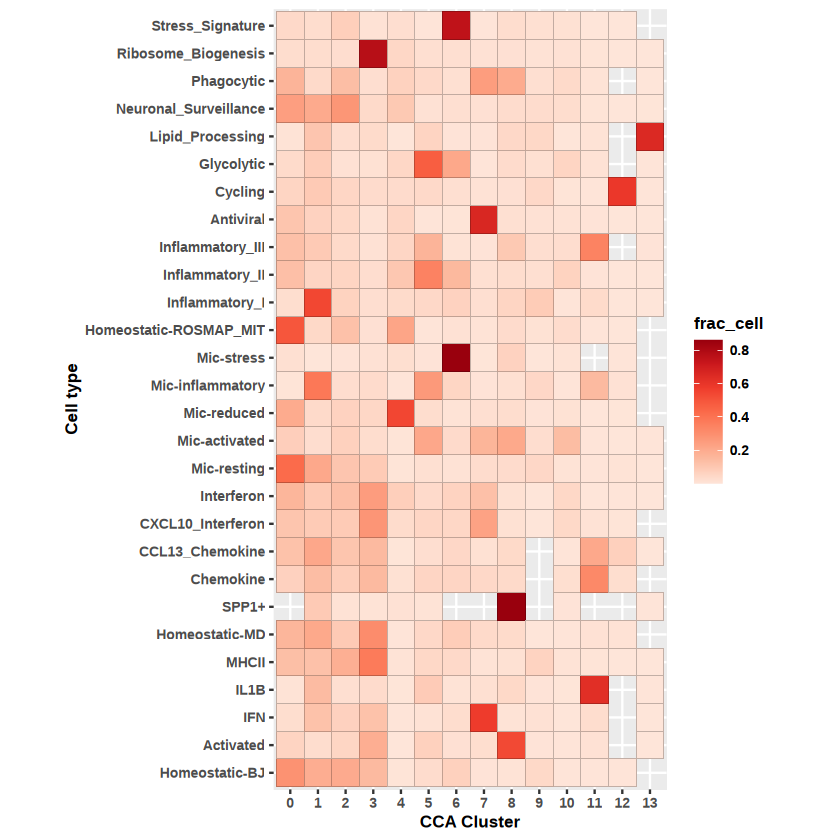

In [4]:
# cell proportion in aech cluster
sobj_new@meta.data %>%
            count(cca_cluster, Cell_type) %>%
            mutate(cca_cluster = factor(cca_cluster, levels = 0:99)) %>%
            mutate(frac = n / sum(n)) %>% # % dataset
            # % of cell type
            group_by(Cell_type) %>%
            mutate(frac_cell = n / sum(n)) %>%
            ungroup() %>%
            # % cluster
            group_by(cca_cluster) %>%
            mutate(frac_clus = n / sum(n)) %>%
            ungroup() %>%
            ggplot(aes(
                y = Cell_type, x = cca_cluster,
                # fill= frac
                fill = frac_cell
                # fill= frac_clus
            )) +
            geom_tile() +
            scale_fill_distiller(palette = "Reds", direction = 1) +
            #labs(title = unique(i$batch))+
    coord_fixed()+geom_tile(color = "black", lwd = 0.05)+
        theme(text = element_text(size = 10, face = "bold"))+
       xlab("CCA Cluster")+ylab("Cell type")

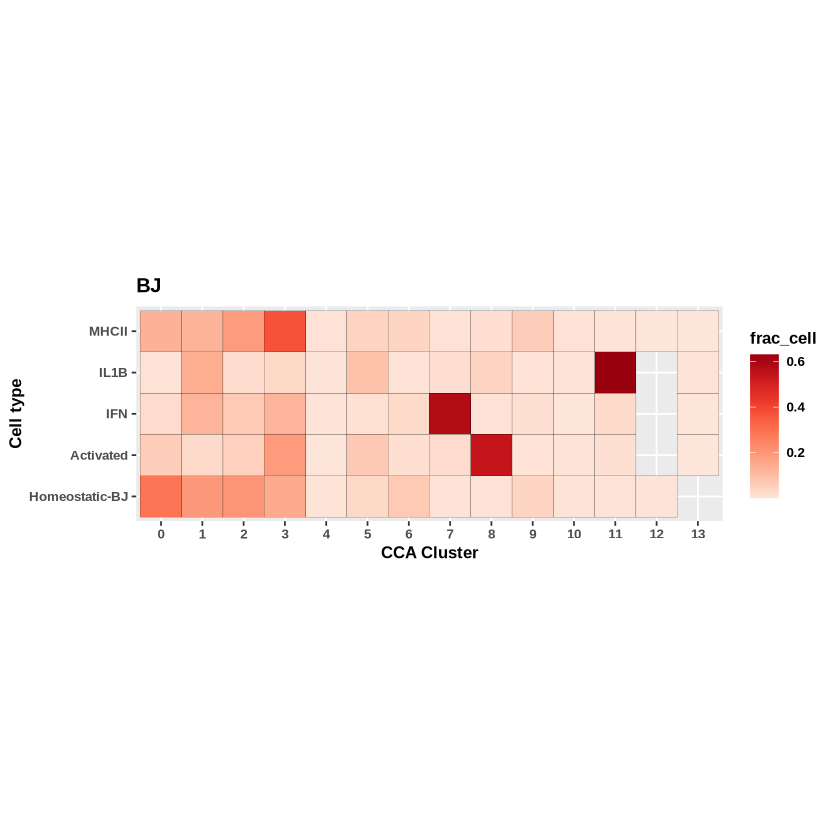

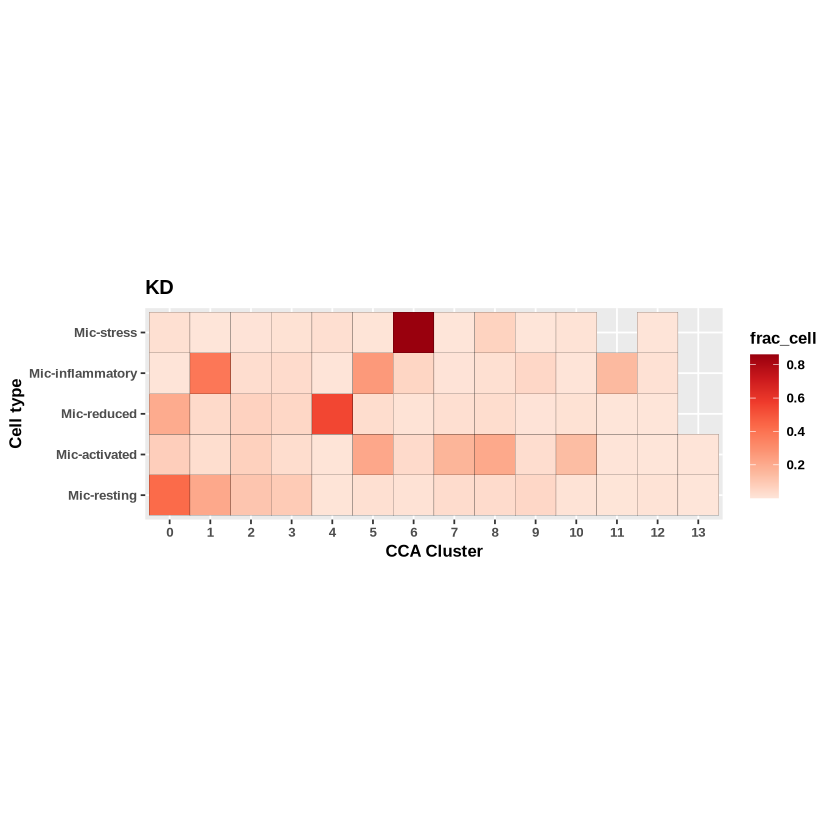

$BJ

$KD

$MD

$ROSMAP_MIT


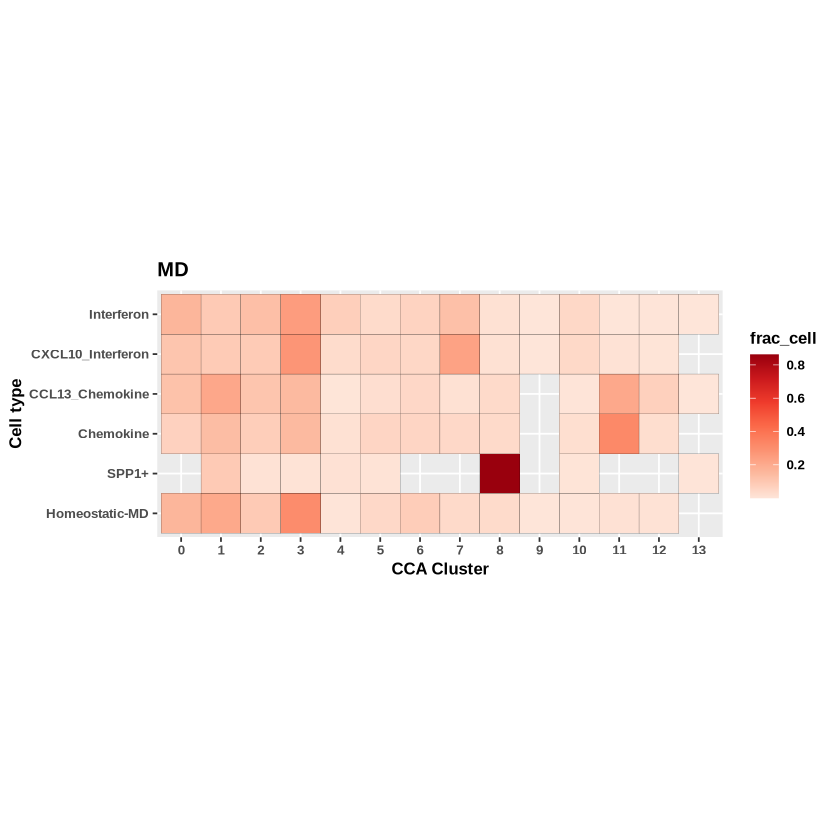

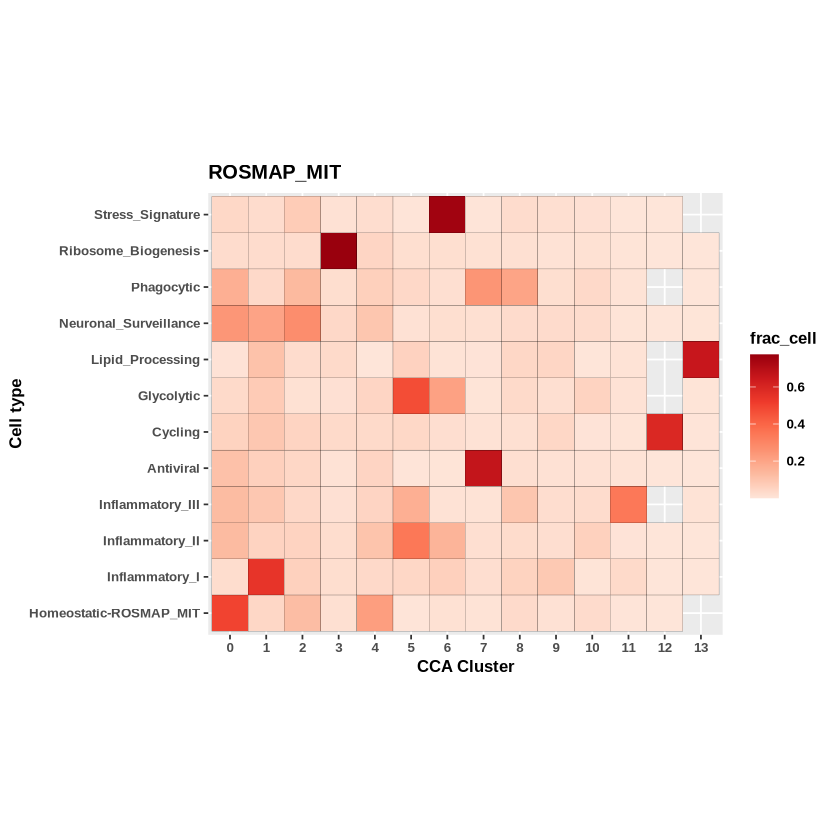

In [35]:
# cell proportion in aech cluster
sobj_new@meta.data %>%
    split(.$batch) %>%
    # .[3] %>%
    lapply(function(i) {
        i %>%
            count(cca_cluster, Cell_type) %>%
            mutate(cca_cluster = factor(cca_cluster, levels = 0:99)) %>%
            mutate(frac = n / sum(n)) %>% # % dataset
            # % of cell type
            group_by(Cell_type) %>%
            mutate(frac_cell = n / sum(n)) %>%
            ungroup() %>%
            # % cluster
            group_by(cca_cluster) %>%
            mutate(frac_clus = n / sum(n)) %>%
            ungroup() %>%
            ggplot(aes(
                y = Cell_type, x = cca_cluster,
                # fill= frac
                fill = frac_cell
                # fill= frac_clus
            )) +
            geom_tile() +
            scale_fill_distiller(palette = "Reds", direction = 1) +
            labs(title = unique(i$batch))+
    coord_fixed()+geom_tile(color = "black", lwd = 0.05)+
        theme(text = element_text(size = 10, face = "bold"))+
       xlab("CCA Cluster")+ylab("Cell type")
    })

In [36]:
table(sobj_new$cca_cluster, sobj_new$Cell_type)

    
     Homeostatic-BJ Activated   IFN  IL1B MHCII Mic-resting Mic-activated
  0            4463       122    46     5   696        3013           283
  1            2963        57   226    94   655        1478            94
  10             54         8     2     1    42          58           504
  11             46        29    50   417    25          15             8
  12             35         0     0     0     4          54             3
  13              0         1     1     2     1           8             8
  2            3127       109   126    13   992         762           252
  3            2287       394   224    22  1988         624           102
  4              72         2     5     1    35          34            17
  5             476       145    20    58   237         131           782
  6            1064        34    53     5   214          68           134
  7              96        52  1080    11    41         215           610
  8             117      1125    

In [5]:
n <- levels(sobj_new) %>% length()
qual_col_pals <- brewer.pal.info[brewer.pal.info$category == "qual", ]
col_vector <- unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
a <- DiscretePalette(n, palette = "set2")

mycolors <- colorRampPalette(brewer.pal(8, "Set1"))(8)

Warning message in DiscretePalette(n, palette = "set2"):
“Not enough colours in specified palette”


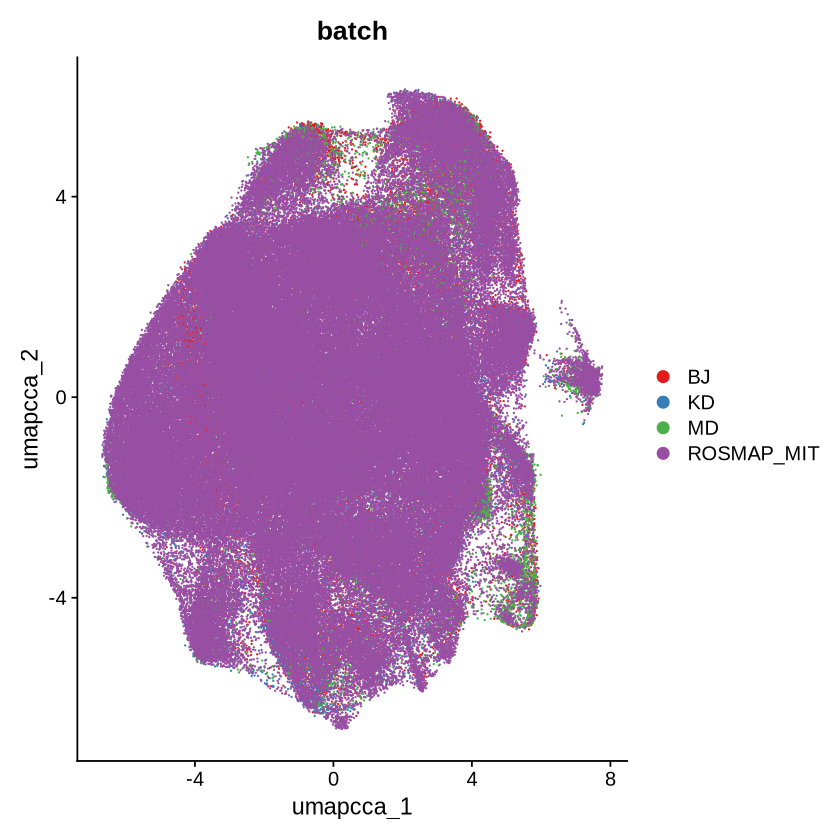

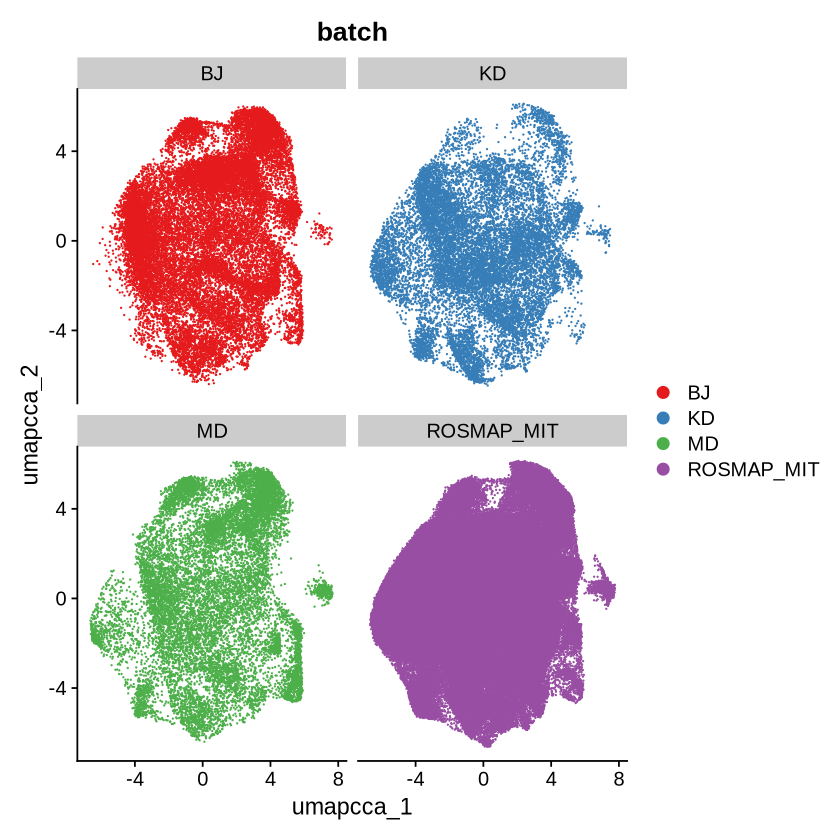

In [38]:
Idents(sobj_new) <- "cca_cluster"
levels(sobj_new) <- 0:(length(levels(sobj_new$cca_cluster)) - 1)

p <- DimPlot(sobj_new, reduction = "umap.cca", group.by = "batch", raster = FALSE, cols = mycolors)
p

p1 <- DimPlot(sobj_new, reduction = "umap.cca", group.by = "batch", raster = FALSE, cols = mycolors)
p1 + facet_wrap(~batch)

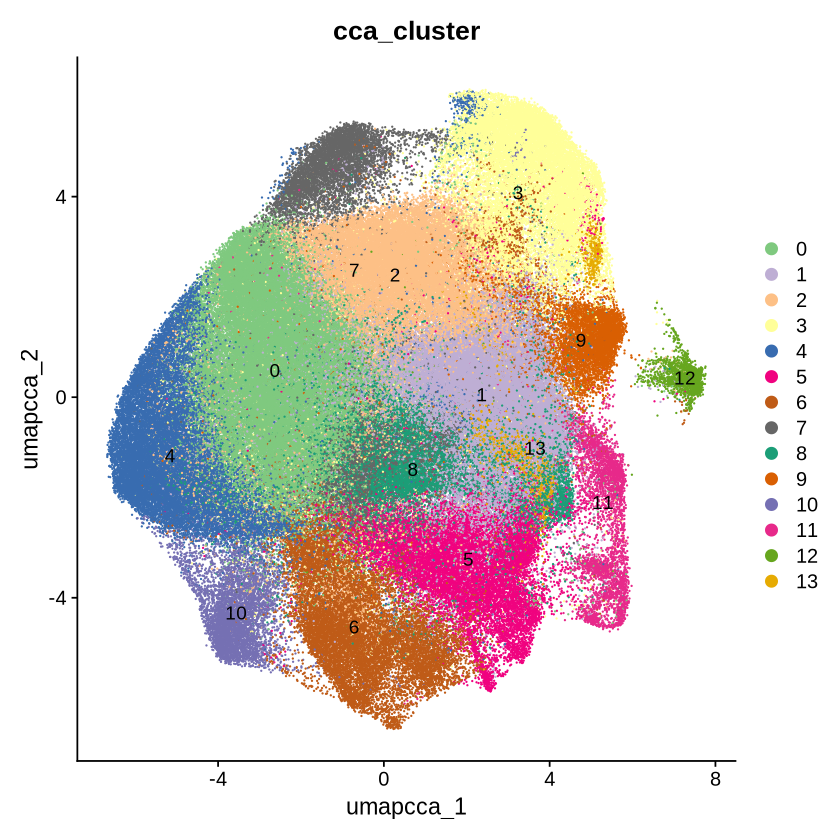

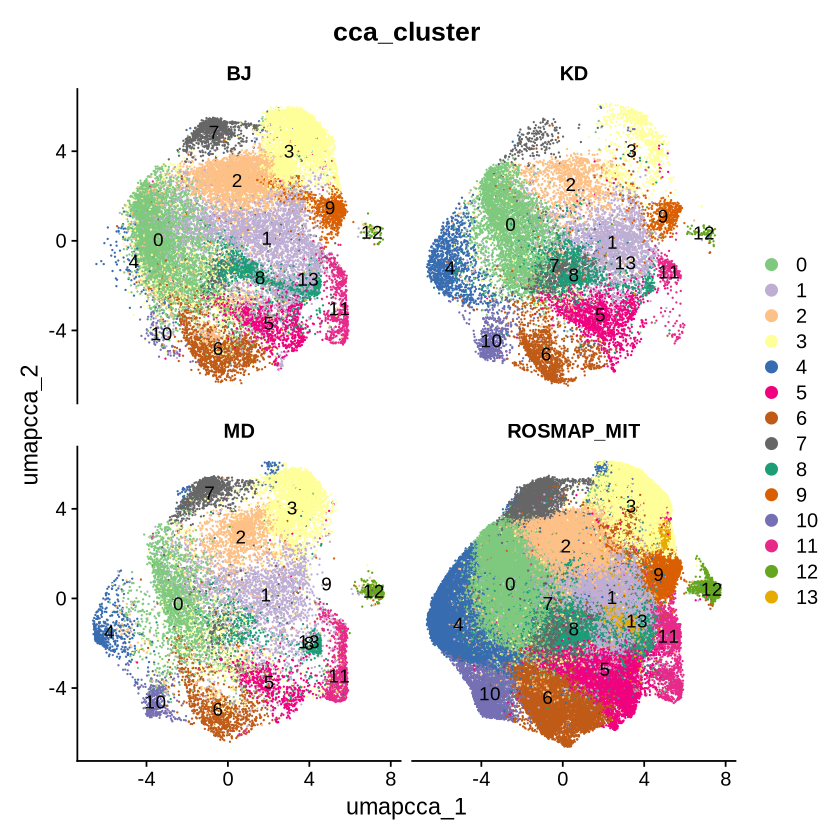

In [39]:
p2 <- DimPlot(sobj_new, reduction = "umap.cca", label = TRUE, group.by = "cca_cluster", raster = FALSE, cols = col_vector[1:18])
p2$data$cca_cluster <- factor(p2$data$cca_cluster, levels = 0:99)
p2

p3 <- DimPlot(sobj_new, reduction = "umap.cca", label = TRUE, group.by = "cca_cluster", split.by = "batch", raster = FALSE, cols = col_vector)
p3$data$cca_cluster <- factor(p3$data$cca_cluster, levels = 0:99)
p3 + facet_wrap(~batch)

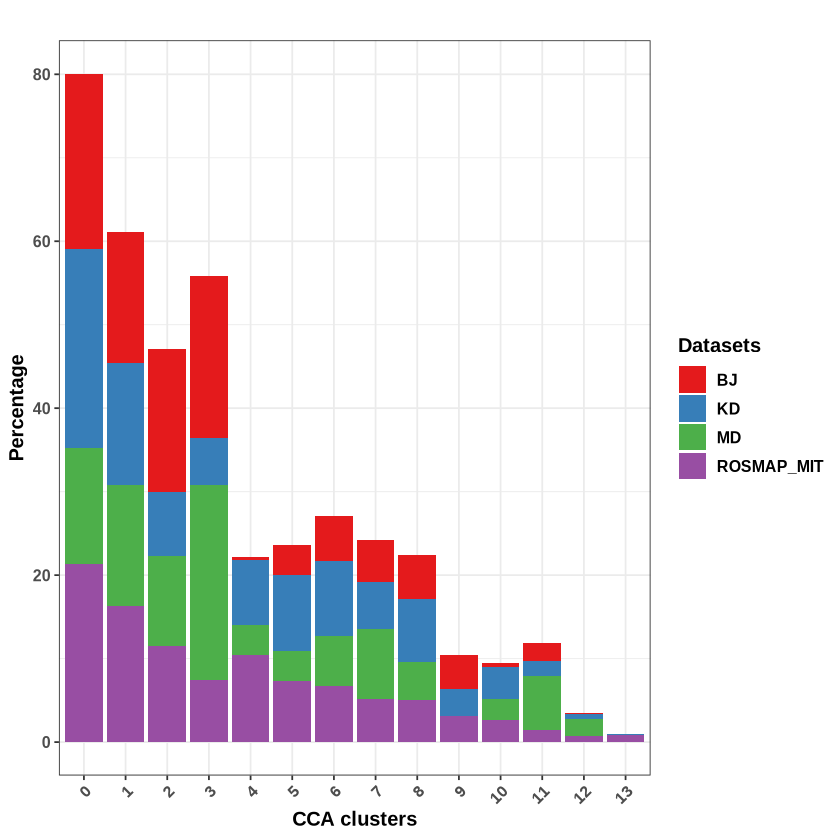

In [24]:
# distribution of batch in each datasets

df <-
  table(sobj_new$cca_cluster, sobj_new$batch) %>%  as.data.frame() %>% 
  group_by(Var2) %>% mutate(frac = Freq / sum(Freq) * 100) %>% 
  ungroup() %>% filter(frac > 0) %>%
  dplyr::rename(
    "CCA clusters" = Var1,
    "Datasets" = Var2,
    "Percentage" = frac
  )

df$`CCA clusters` <- factor(df$`CCA clusters`, levels = as.character(0:99))

p <-
  ggplot(df, aes(x = `CCA clusters`, y = Percentage, fill = Datasets)) +
  #ggplot(df, aes(x = Datasets, y = Percentage, fill = `CCA clusters`)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = mycolors) +
  theme_bw() +
  theme(text = element_text(size = 12, face = "bold")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("")

p

In [18]:
table(sobj_new$batch, sobj_new$cca_cluster)

            
                 0     1    10    11    12    13     2     3     4     5     6
  BJ          5332  3995   107   567    39     5  4367  4915   115   936  1370
  KD          3743  2296   602   269    86    16  1199   896  1217  1418  1418
  MD          2141  2228   386  1003   304     3  1656  3576   550   566   925
  ROSMAP_MIT 35489 27052  4477  2362  1294  1455 19163 12445 17395 12097 11101
            
                 7     8     9
  BJ          1280  1361  1018
  KD           878  1173   515
  MD          1293   714     5
  ROSMAP_MIT  8567  8294  5148

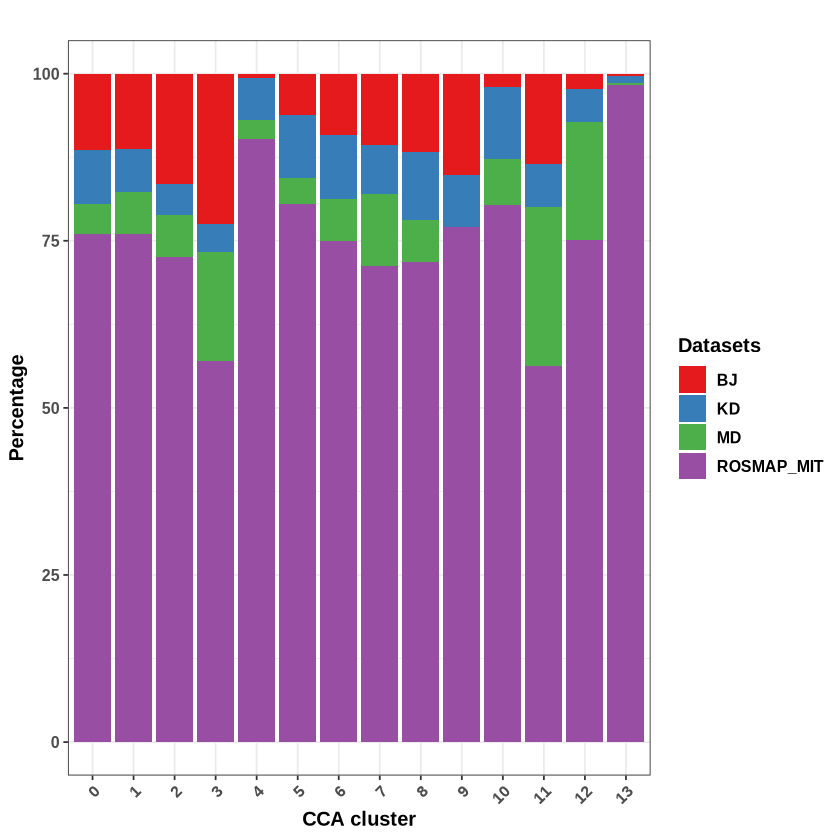

In [25]:
df <-
  table(sobj_new$batch, sobj_new$cca_cluster) %>%  as.data.frame() %>% 
  group_by(Var2) %>% mutate(frac = Freq / sum(Freq) * 100) %>% 
  ungroup() %>% filter(frac > 0) %>%
  dplyr::rename(
    "CCA cluster" = Var2,
    "Datasets" = Var1,
    "Percentage" = frac
  )
df$`CCA cluster` <- factor(df$`CCA cluster`, levels = as.character(0:99))
p <-
  ggplot(df, aes(x = `CCA cluster`, y = Percentage, fill = Datasets)) +
  #ggplot(df, aes(x = Datasets, y = Percentage, fill = `CCA clusters`)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = mycolors) +
  theme_bw() +
  theme(text = element_text(size = 12, face = "bold")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("")

p


In [30]:
# Biological conservation 
#1 HVG

#obj1_filtered <- SCTransform(obj1_filtered)
#obj2_filtered <- SCTransform(obj2_filtered)
#obj3_filtered <- SCTransform(obj3_filtered)
ROSMAP_MIT_micro <- SCTransform(ROSMAP_MIT_micro)

bj_data <- subset(sobj_new, subset = batch == "BJ")
kd_data <- subset(sobj_new, subset = batch == "KD")
md_data <- subset(sobj_new, subset = batch == "MD")
rosmap_data <- subset(sobj_new, subset = batch == "ROSMAP_MIT")

obj1_HVG_before <- VariableFeatures(obj1_filtered, assay = "SCT")
obj2_HVG_before <- VariableFeatures(obj2_filtered, assay = "SCT")
obj3_HVG_before <- VariableFeatures(obj3_filtered, assay = "SCT")
obj4_HVG_before <- VariableFeatures(ROSMAP_MIT_micro, assay = "SCT")

obj1_HVG_after <- VariableFeatures(bj_data, assay = "SCT")
obj2_HVG_after <- VariableFeatures(kd_data, assay = "SCT")
obj3_HVG_after <- VariableFeatures(md_data, assay = "SCT")
obj4_HVG_after <- VariableFeatures(rosmap_data, assay = "SCT")

obj1_HVG <- length(intersect(obj1_HVG_before, obj1_HVG_after)) / length(obj1_HVG_after)
obj2_HVG <- length(intersect(obj2_HVG_before, obj2_HVG_after)) / length(obj2_HVG_after)
obj3_HVG <- length(intersect(obj3_HVG_before, obj3_HVG_after)) / length(obj3_HVG_after)
obj4_HVG <- length(intersect(obj4_HVG_before, obj4_HVG_after)) / length(obj4_HVG_after)

Running SCTransform on assay: RNA

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 16169 by 166339

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit =

In [ ]:
obj1_HVG
obj2_HVG
obj3_HVG
obj4_HVG

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_tile(color = "black", lwd = 0.1, limits = c(0, 7)):
“Ignoring unknown parameters: `limits`”


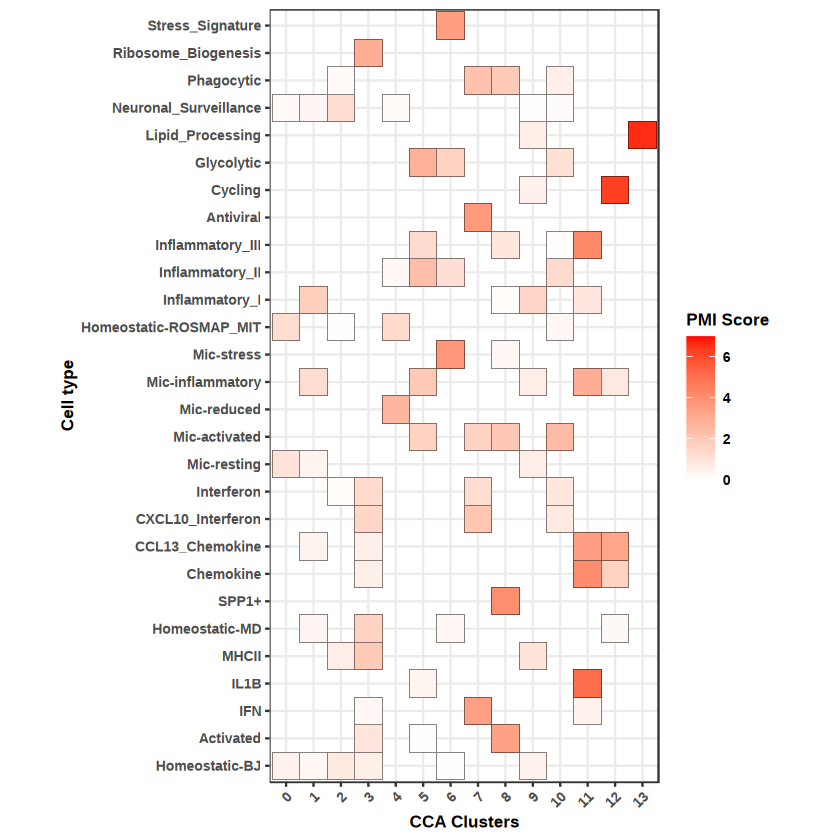

In [5]:
# PMI - pointwise mutual information
table_pmi <- table(sobj_new$cca_cluster, sobj_new$Cell_type)

pmi_score <- pmi(table_pmi)

data <- pmi_score %>%
    as.data.frame() %>%
    group_by(Var1) %>%
    ungroup() %>%
    filter(Freq > 0) %>%
    mutate(`PMI Score` = Freq)

p <- data %>% ggplot(aes(x = Var1, y = Var2, fill = `PMI Score`)) +
    geom_tile() +
    scale_fill_viridis() +
    scale_fill_distiller(palette = "Reds", direction = 1) +
    xlab("CCA Clusters") +
    ylab("Cell type") +
    scale_fill_gradient2(low = "white", high = "red", limits = c(0, 7)) +
    coord_fixed() +
    geom_tile(color = "black", lwd = 0.1, limits = c(0, 7)) +
    theme_bw() +
    theme(text = element_text(size = 10, face = "bold")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p$data$Var1 <- factor(p$data$Var1, levels = 0:99)

p
ggsave(file = "PMI_heatmap.pdf", height = 6, width = 6)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_tile(color = "black", lwd = 0.1, limits = c(0, 7)):
“Ignoring unknown parameters: `limits`”


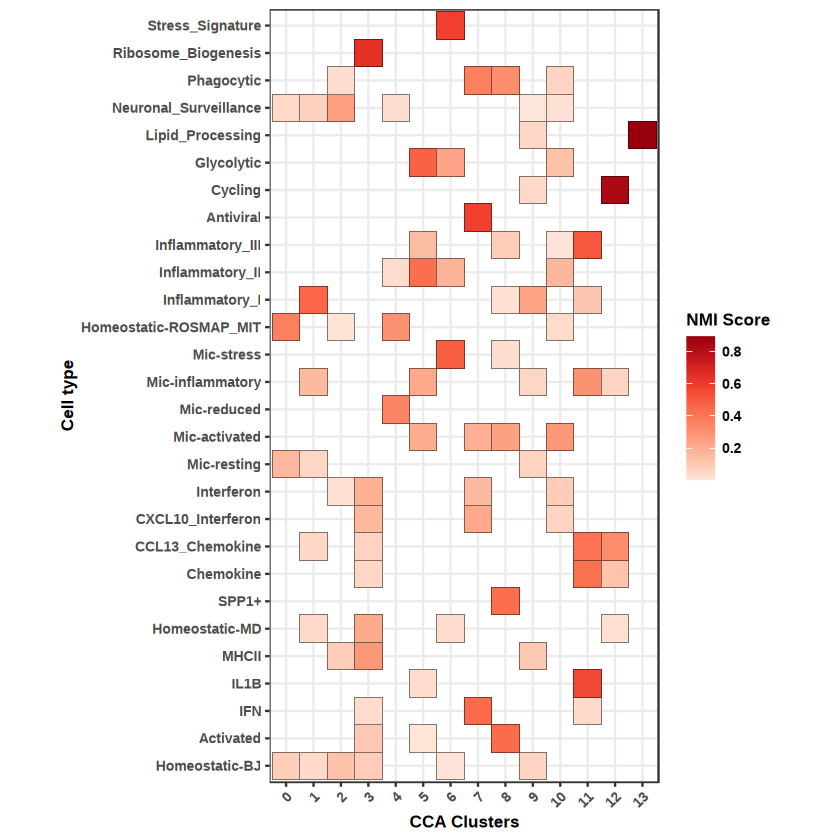

In [6]:
# NMI - Normalized mutual information
table_nmi <- table(sobj_new$cca_cluster, sobj_new$Cell_type)

nmi_score <- nmi(table_nmi, normalize = TRUE)

data <- nmi_score %>%
    as.data.frame() %>%
    group_by(Var1) %>%
    ungroup() %>%
    filter(Freq > 0) %>%
    mutate(`NMI Score` = Freq)

p <- data %>% ggplot(aes(x = Var1, y = Var2, fill = `NMI Score`)) +
    geom_tile() +
    scale_fill_viridis() +
    scale_fill_distiller(palette = "Reds", direction = 1) +
    xlab("CCA Clusters") +
    ylab("Cell type") +
    #scale_fill_gradient2(low = "white", high = "red", limits = c(0, 7)) +
    coord_fixed() +
    geom_tile(color = "black", lwd = 0.1, limits = c(0, 7)) +
    theme_bw() +
    theme(text = element_text(size = 10, face = "bold")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p$data$Var1 <- factor(p$data$Var1, levels = 0:99)

p
ggsave(file = "NMI_heatmap.pdf", height = 6, width = 6)


In [44]:
length(unique(sobj_new$batch))

[1] 4

In [4]:

NMI_val = lapply(1:length(unique(sobj_new$batch)),function(ind){
    
    nm = unique(sobj_new$batch)[ind]


sobj_new_sub <- subset(sobj_new, subset= batch == nm)

table_nmi <- table(sobj_new_sub$cca_cluster, sobj_new_sub$Cell_type)

nmi_score <- pmi(table_nmi, normalize = TRUE)
return(nmi_score)
})

In [9]:
range(NMI_val[[4]])

[1] -0.4657858  0.8913800

In [46]:
# NMI - Normalized mutual information


NMIPlots = lapply(1:length(unique(sobj_new$batch)),function(ind){
    
    nm = unique(sobj_new$batch)[ind]


sobj_new_sub <- subset(sobj_new, subset= batch == nm)

table_nmi <- table(sobj_new_sub$cca_cluster, sobj_new_sub$Cell_type)

nmi_score <- pmi(table_nmi, normalize = TRUE)

data <- nmi_score %>%
    as.data.frame() %>%
    group_by(Var1) %>%
    ungroup() %>%
    filter(Freq > 0) %>%
    mutate(`NMI Score` = Freq)

p <- data %>% ggplot(aes(x = Var1, y = Var2, fill = `NMI Score`)) +
    geom_tile() +
    scale_fill_viridis() +
    scale_fill_distiller(palette = "Reds", direction = 1) +
    xlab("CCA Clusters") +
    ylab("Cell type") +
    #scale_fill_gradient2(low = "white", high = "red", limits = c(0, 7)) +
    coord_fixed() +
    geom_tile(color = "black", lwd = 0.1, limits = c(0, 7)) +
    theme_bw() +
    theme(text = element_text(size = 10, face = "bold")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p$data$Var1 <- factor(p$data$Var1, levels = 0:99)
return(p)
})


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_tile(color = "black", lwd = 0.1, limits = c(0, 7)):
“Ignoring unknown parameters: `limits`”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_tile(color = "black", lwd = 0.1, limits = c(0, 7)):
“Ignoring unknown parameters: `limits`”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_tile(color = "black", lwd = 0.1, limits = c(0, 7)):
“Ignoring unknown parameters: `limits`”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_tile(color = "black", lwd = 0.1, limits = c(0, 7)):
“Ignoring unknown parameters: `limits`”


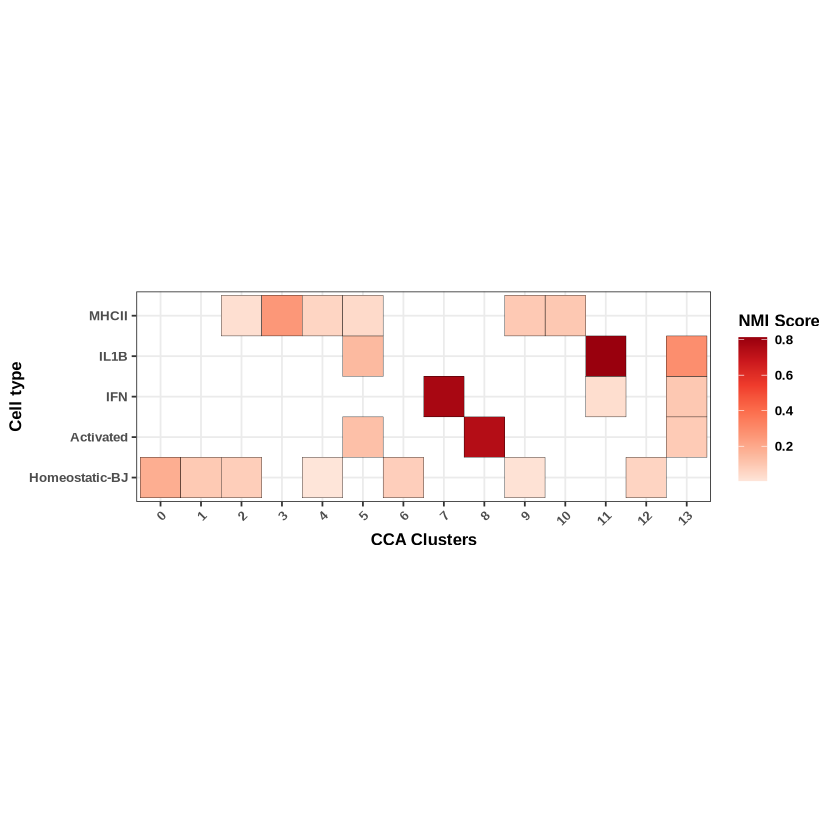

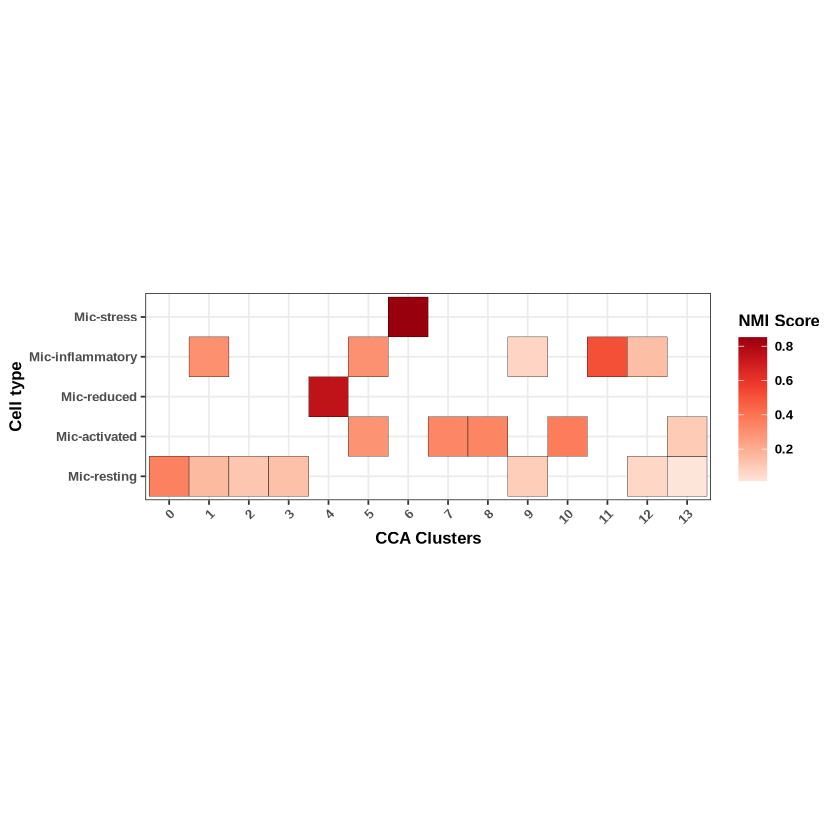

[[1]]

[[2]]

[[3]]

[[4]]


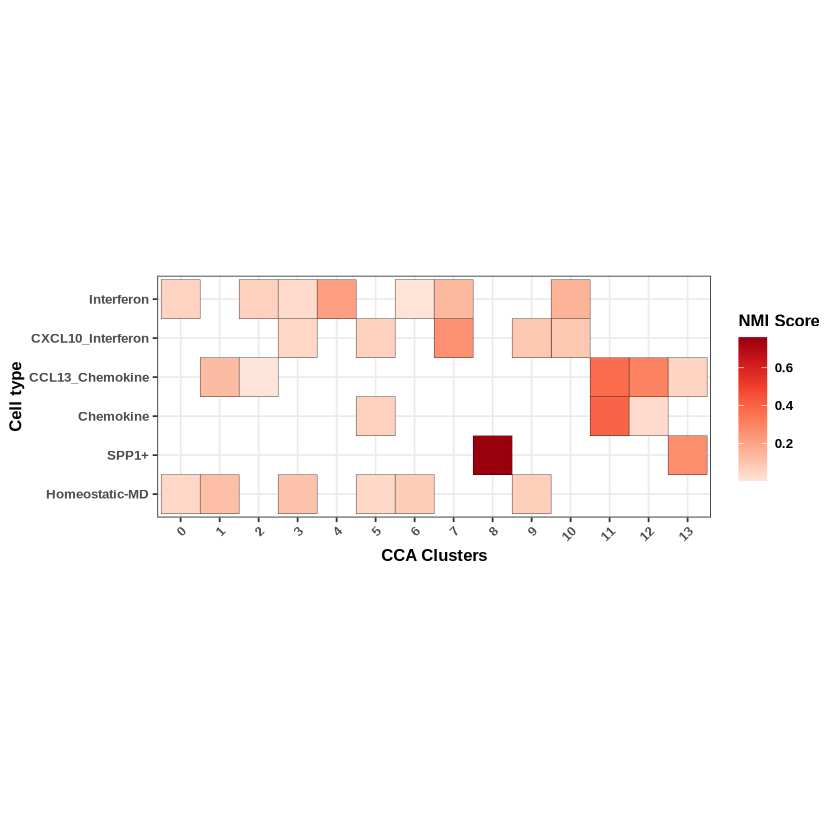

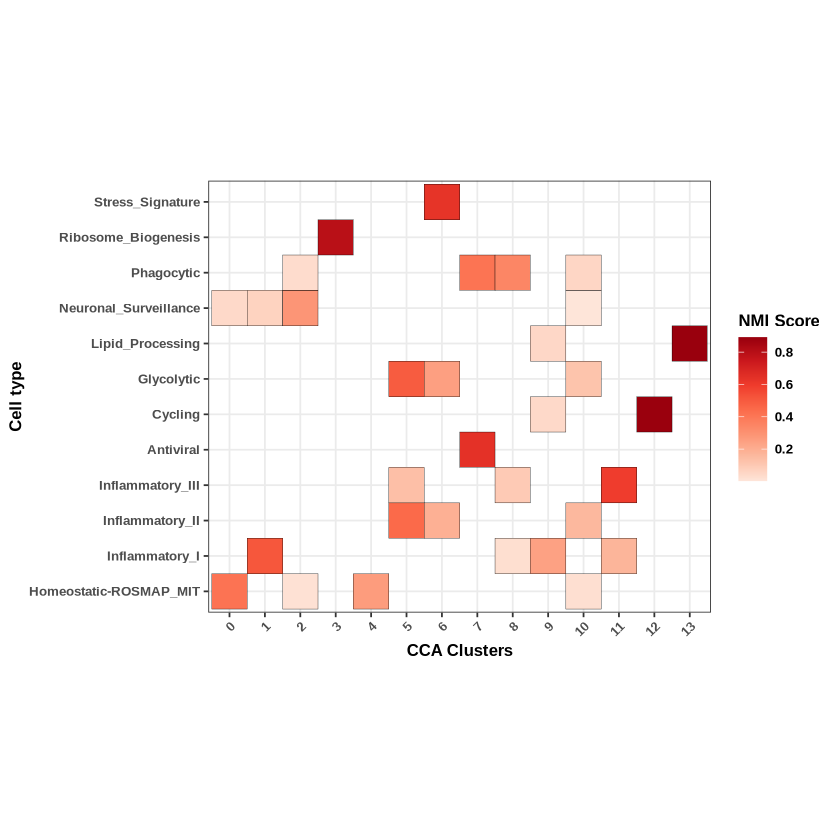

In [47]:
NMIPlots

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


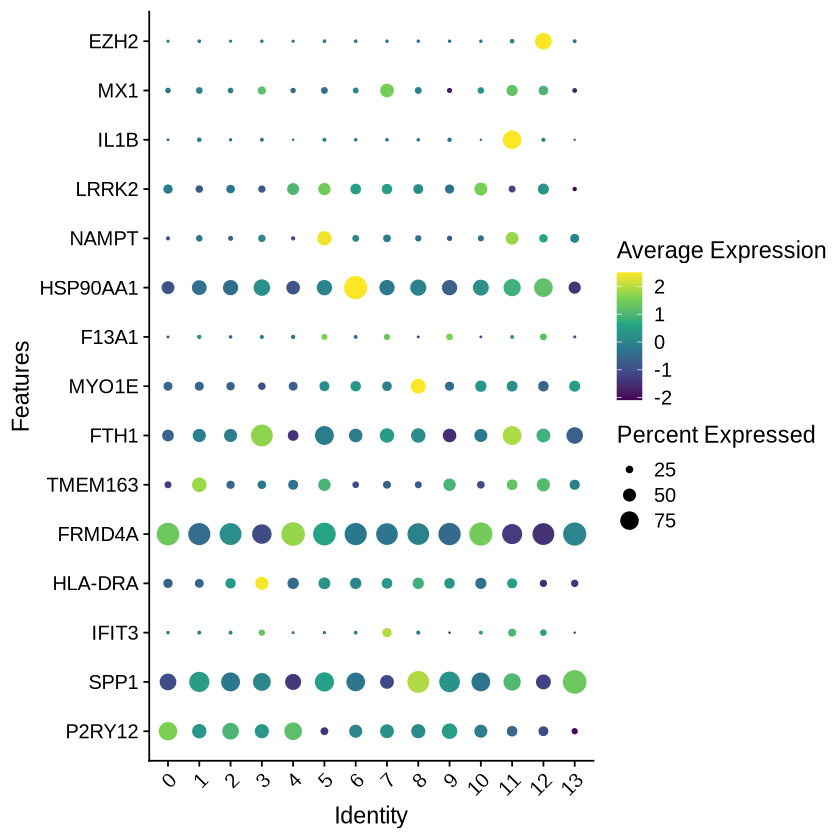

In [45]:
# Marker analysis

Idents(sobj_new) <- sobj_new$cca_cluster

 homeostatic <- c("P2RY12")
 dam<- c("SPP1")
 ifn <- c("IFIT3")
 mhc <- c("HLA-DRA")
 neuronal_surveillance <- c("FRMD4A")
 inflammatory_I <- c("TMEM163")
 Ribosome_biogenesis <- c("FTH1")
 lipid_processing <- c("MYO1E")
 Phagocytic <- c("F13A1")
 Stress_sig <- c("HSP90AA1")
 glycolytic<- c("NAMPT")
 inflammatory_II<-c("LRRK2") 
 inflammatory_III <- c("IL1B") #IL1B
 Antiviral <- c("MX1")
 cycling <- c("EZH2")
 
 all_gene_list <- c(homeostatic,dam,ifn, mhc, neuronal_surveillance,inflammatory_I, Ribosome_biogenesis, lipid_processing,
                    Phagocytic,Stress_sig,glycolytic,inflammatory_II,inflammatory_III,
                    Antiviral, cycling
                    )

 all_gene_list<- as.list(all_gene_list)
  names(all_gene_list) <-  c("Homeostatic","Activated","IFN", "MHCII", "Neuronal_surveillance",
                             "Inflammatory_I","Ribosome_biogenesis", "Lipid_processing",
                              "Phagocytic","Stress_sig","Glycolytic","Inflammatory_II",
                             "Inflammatory_III","Antiviral", "Cycling")

Idents(sobj_new) <- "cca_cluster"
all_gene_list2 <- c(homeostatic,dam,ifn, mhc, neuronal_surveillance,inflammatory_I, Ribosome_biogenesis, lipid_processing,
                    Phagocytic,Stress_sig,glycolytic,inflammatory_II,inflammatory_III,
                    Antiviral, cycling
                    )
 p <- DotPlot(object = sobj_new, features = unique(all_gene_list2))+ RotatedAxis()+ scale_color_viridis_c()+coord_flip()

 p$data$id <- factor(p$data$id, levels = 0:99)
p
ggsave(plot = p,"dotplot_marker.png", height = 10, width = 9)

Genescore

In [2]:
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta.qs", nthreads = 6)

In [151]:
# ROSMAP markers analysis

ROSMAP_art_marker  <- read_excel("~/integration_project/step_1/SupplementalTables.combined.xlsx", sheet = 3)

gene_list <- lapply(unique(ROSMAP_art_marker$microgliaState), function(x){
gene <- ROSMAP_art_marker$gene[ROSMAP_art_marker$microgliaState == x]
return(gene)
})
names(gene_list) <- c("Homeostatic","Neuronal_Surveillance",
                      "Inflammatory_I","Ribosome_Biogenesis","Lipid_Processing",
                      "Phagocytic","Stress_Signature","Glycolytic",
                      "Inflammatory_II","Inflammatory_III","Antiviral","Cycling")

In [154]:
lapply(gene_list, length) %>% as.data.frame()

Homeostatic Neuronal_Surveillance Inflammatory_I Ribosome_Biogenesis
1 89          41                    181            148                
  Lipid_Processing Phagocytic Stress_Signature Glycolytic Inflammatory_II
1 179              179        241              360        133            
  Inflammatory_III Antiviral Cycling
1 239              73        365

In [147]:
## Genescore - ROSMAP markers analysis with Seurat
sobj_new = AddModuleScore(sobj_new,gene_list,name="Seurat")

colnames(sobj_new@meta.data)[grep("Seurat",colnames(sobj_new@meta.data))] = 
paste0(c("Homeostatic","Neuronal_Surveillance",
                      "Inflammatory_I","Ribosome_Biogenesis","Lipid_Processing",
                      "Phagocytic","Stress_Signature","Glycolytic",
                      "Inflammatory_II","Inflammatory_III","Antiviral","Cycling"),sep="_","Seurat")

In [97]:
sobj_new$cca_cluster <- factor(sobj_new$cca_cluster, levels= 0:13)

In [99]:
levels(sobj_new$cca_cluster)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13"

In [ ]:
Idents(sobj_new) <- "cca_cluster"

geneSigPlots = lapply(1:length(c("Homeostatic","Neuronal_Surveillance",
                      "Inflammatory_I","Ribosome_Biogenesis","Lipid_Processing",
                      "Phagocytic","Stress_Signature","Glycolytic",
                      "Inflammatory_II","Inflammatory_III","Antiviral","Cycling")),function(ind){
    
    nm = paste0(c("Homeostatic","Neuronal_Surveillance",
                      "Inflammatory_I","Ribosome_Biogenesis","Lipid_Processing",
                      "Phagocytic","Stress_Signature","Glycolytic",
                      "Inflammatory_II","Inflammatory_III","Antiviral","Cycling"),sep="_","Seurat")[ind]
  
  message(nm)
  df = data.frame(Cluster = sobj_new$cca_cluster, Sig =  sobj_new@meta.data[,nm], Sample = sobj_new$Sample.ID) 
 # df <- subset(df, subset = (Sig > -0.1 & Sig < 0.1))
  df2 = df
  
  tmp = unlist(lapply(levels(df2$Cluster),function(cl){
    df2$cl = df2$Cluster == cl
    message(cl)
    re = lmer(Sig ~ cl + (1|Sample), data = df2)
   return(sprintf('B=%s\nP=%s',signif(summary(re)$coefficients[2,'Estimate'], digits=1),signif(summary(re)$coefficients[2,'Pr(>|t|)'], digits=3)))
      }))
 
 p = ggviolin(df2,x='Cluster',y='Sig',fill = 'Cluster',draw_quantiles=c(0.25,0.5,0.75),trim=T) +
   ggtitle(sprintf('%s',nm))+ 
   #geom_jitter(size=0.01,alpha =0.2)+ 
   stat_summary(fun = "mean", geom = "crossbar", width = 0.5, colour = "red")+
   stat_summary(fun = mean, geom = "text", col = "black", vjust = -1, aes(label = paste("Mean:", round(..y.., digits = 2)))) +
 ylab('Significant upregulated genes') + xlab('Integrated clusters') + rremove('legend')  +theme_minimal()
   
 p = p + annotate("text", x = 1:2:3:4:5:6:7:8:9:10:11:12:13:14, y = max(df$Sig)+0.11, label = tmp, size = 5)+ theme(text = element_text(size = 12)) + theme(text = element_text(size = 20, face = "bold"))
 p <- p+theme(axis.text.x = element_text(angle = 45, hjust = 1))+NoLegend()

p
plot(p)

ggsave(paste0("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/ROSAMP_", nm, "_genescore.pdf"), height = 10, width = 20)
  })

BJ genescore

In [155]:
BJ_art_marker  <- read_excel("~/integration_project/step_1/13024_2021_473_MOESM1_ESM.xlsx", sheet = 4)

BJ_gene_list <- lapply(unique(BJ_art_marker$cluster), function(x){
gene <- BJ_art_marker$Gene[BJ_art_marker$cluster == x & BJ_art_marker$avg_logFC > 0.25]
return(gene)
})

names(BJ_gene_list) <- c("Homeostatic-BJ","MHCII","DAM","IFN","IL1B","Humanin_Like","Degranulation")

head(BJ_gene_list)

$`Homeostatic-BJ`
 [1] "HBB"      "ABCG2"    "FOLR2"    "EGFL7"    "IL3RA"    "LYVE1"   
 [7] "MRC1"     "VSIG4"    "TLE4"     "JAG1"     "SLC7A8"   "IER3"    
[13] "FSCN1"    "ACY3"     "SSBP2"    "CST3"     "C12orf75" "RHOB"    
[19] "PMEPA1"   "XBP1"     "SFMBT2"   "ADGRG1"  

$MHCII
 [1] "HLA-DRA"  "HLA-DRB1" "HLA-DPA1" "HLA-DPB1" "HLA-DRB5" "HLA-DMA" 
 [7] "CD74"     "HLA-DQA2" "HLA-DQA1" "HLA-DQB1" "HLA-DMB"  "MS4A6A"  
[13] "CIITA"    "HLA-C"    "APOC2"    "CD37"     "HLA-A"    "APOC1"   
[19] "HLA-B"    "TMSB10"   "SERPINA1" "FCER1G"   "CAPG"     "ID2"     
[25] "LILRB4"  

$DAM
 [1] "CD9"       "CD83"      "APOC1"     "OLR1"      "LIPA"      "RAMP1"    
 [7] "SPP1"      "LGALS1"    "NAP1L1"    "ASAH1"     "SLC1A3"    "MAFB"     
[13] "PLA2G7"    "SCIN"      "DBI"       "CTSD"      "SOCS6"     "SGK1"     
[19] "FABP5"     "GYPC"      "TMEM144"   "ITGAX"     "HLA-DPB1"  "TREM2"    
[25] "FAM129A"   "PDPN"      "HLA-DRA"   "DHRS9"     "S100A11"   "HLA-DPA1" 
[31] "MS4A7"     "MSR1"      "CXCR4"     "EDN1"      "FABP3"     "CSTB"     
[37] "HLA-DRB1"  "CEBPA"     "LPL"       "LGALS3"    "RTTN"      "IER5L"    
[43] "LITAF"     "CD74"      "C3AR1"     "PADI2"     "HLA-DQB1"  "TGFBR1"   
[49] "SLC11A1"   "MYO1E"     "CCL3"      "ATP6V1F"   "CD36"      "KLF6"     
[55] "GLDN"      "HLA-DRB5"  "LRRC39"    "RASGEF1B"  "KCNJ2"     "ACTG1"    
[61] "HLA-DMA"   "WIPF3"     "FTH1"      "APOC2"     "ADK"       "UBE2J1"   
[67] "FAM20C"    "GPNMB"     "APOE"      "HLA-DQA2"  "LIMS1"     "LILRA4"   
[73] "PDGFA"     "PTGER4"    "ALAS1"     "BTG1"      "CHI3L1"    "CTSL"     
[79] "TIGD4"     "GALNT1"    "IL4I1"     "NPL"       "GABARAPL1" "GADD45G"  
[85] "mEGFP"     "SQSTM1"    "CLEC19A"   "CALM1"     "KCNMA1"    "ID2"      
[91] "SCPEP1"    "PTCRA"     "DNASE2"    "MPDZ"     

$IFN
 [1] "ISG15"    "IFI44L"   "IFI6"     "IFIT1"    "IFI27"    "IFIT3"   
 [7] "IFITM3"   "LY6E"     "MX1"      "MX2"      "IFIT2"    "XAF1"    
[13] "IRF7"     "EPSTI1"   "HERC5"    "SAMD9L"   "STAT1"    "RNF213"  
[19] "IFI44"    "PARP14"   "TYMP"     "CXCL10"   "TNFSF10"  "EIF2AK2" 
[25] "OAS1"     "MT2A"     "OAS3"     "PLSCR1"   "PARP9"    "LAP3"    
[31] "SP110"    "BST2"     "LGALS3BP" "IFI35"    "SAMD9"    "PSMB9"   
[37] "APOL6"    "DDX60L"   "OAS2"     "TRIM22"   "UBE2L6"   "TNFSF13B"
[43] "IRF1"     "TAP1"     "HLA-A"    "IFITM2"   "GBP1"     "PPM1K"   
[49] "RABGAP1L" "IRF9"     "ODF3B"    "OASL"     "DTX3L"    "HLA-C"   
[55] "USP18"    "DYNLT1"   "SERPING1" "PSME2"    "DDX60"    "STAT2"   
[61] "HLA-B"    "B2M"      "WARS"     "HERC6"    "PNPT1"    "HLA-F"   
[67] "IFIH1"    "HLA-DPA1" "HPSE"     "SPATS2L"  "ZBP1"     "HESX1"   
[73] "CD48"     "HLA-DRB1" "IFITM1"   "MNDA"     "GBP4"     "IFIT5"   
[79] "TMSB10"   "NAMPT"    "MAFB"     "TRIM56"   "SPTLC2"   "ANKRD22" 
[85] "DKK1"     "DDX58"    "HLA-DRA"  "TAP2"     "ISG20"    "HLA-DRB5"
[91] "TRIM14"   "TMEM176B"

$IL1B
  [1] "CXCL10"   "CCL4L2"   "CCL4"     "CCL2"     "CCL3L1"   "CCL3"    
  [7] "CCL8"     "IL1B"     "HAMP"     "CH25H"    "IFIT3"    "CD83"    
 [13] "IER2"     "ISG15"    "RGS16"    "IL4I1"    "GPR84"    "EGR1"    
 [19] "ZFP36"    "CDKN1A"   "JUNB"     "IRF1"     "MX1"      "TYMP"    
 [25] "IFI6"     "BCL2A1"   "IFIT1"    "IFI44L"   "TNF"      "ICAM1"   
 [31] "NFKBIA"   "IFIT2"    "GADD45B"  "BTG2"     "POU2F2"   "GBP1"    
 [37] "MCL1"     "IFITM3"   "SOD2"     "SOCS3"    "SGK1"     "LAP3"    
 [43] "IFI27"    "TNFSF10"  "EGR3"     "NFKBIZ"   "GOLGA4"   "NFKB2"   
 [49] "NAMPT"    "IL1A"     "IRF7"     "MAFB"     "CEBPB"    "SPP1"    
 [55] "MX2"      "REL"      "BATF"     "EBI3"     "SLC1A3"   "PDGFA"   
 [61] "PLEK"     "KDM6B"    "PLSCR1"   "BAZ1A"    "PIM3"     "FOS"     
 [67] "LY6E"     "TNFAIP2"  "TAP1"     "PLAUR"    "TNFAIP3"  "SERPINB9"
 [73] "VASP"     "RELB"     "SAMD9L"   "VMP1"     "FPR1"     "PTGER4"  
 [79] "EPSTI1"   "CD69"     "TIFA"     "PARP14"   "NUP62"    "CD40"    
 [85] "BCL6"     "B4GALT1"  "NFKBID"   "PPP1R15A" "ANKRD22"  "GCH1"    
 [91] "PLK3" 

In [156]:
lapply(BJ_gene_list, length) %>% as.data.frame()

Homeostatic.BJ MHCII DAM IFN IL1B Humanin_Like Degranulation
1 22             25    94  92  183  39           88

In [106]:

## Genescore - BJ markers analysis with Seurat
sobj_new = AddModuleScore(sobj_new,BJ_gene_list[1:5],name="BJ_Seurat")

colnames(sobj_new@meta.data)[grep("BJ_Seurat",colnames(sobj_new@meta.data))] = 
paste0(c("Homeostatic_BJ","MHCII","DAM","IFN","IL1B"),sep="_","BJ_Seurat")

Warning message:
“The following features are not present in the object: mEGFP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: mEGFP, not searching for symbol synonyms”


Homeostatic_BJ_BJ_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements: o

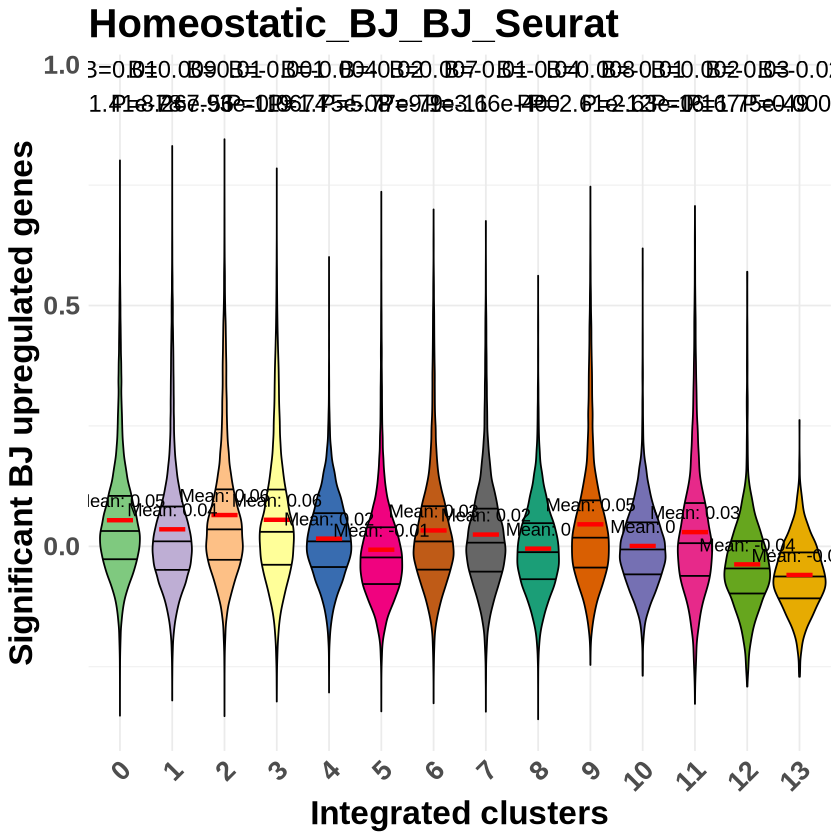

IFN_BJ_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements: only the fir

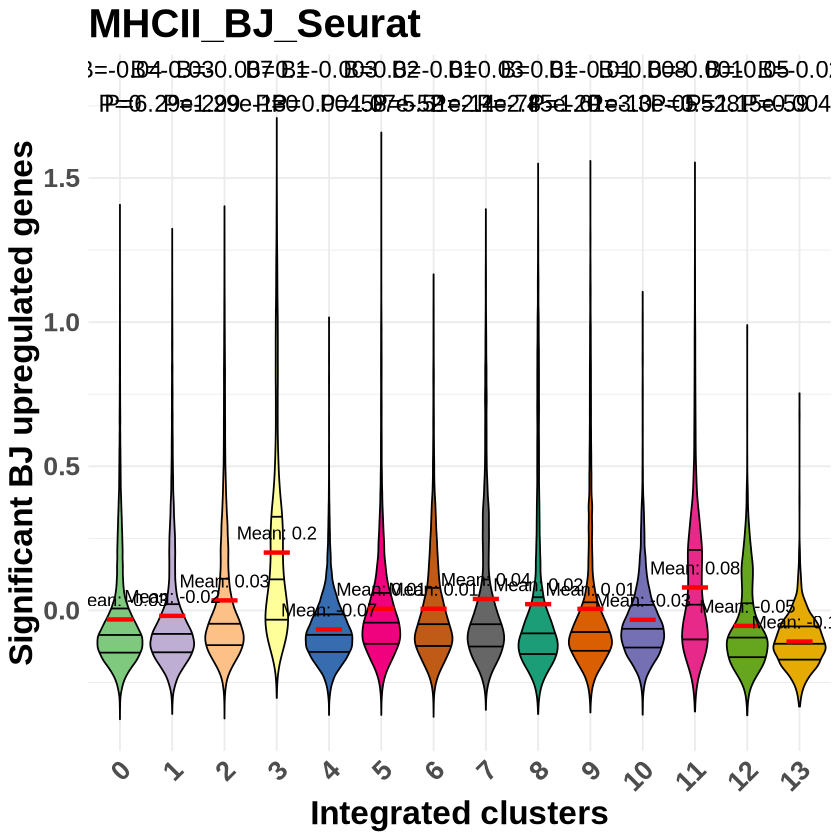

IL1B_BJ_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements: only the fi

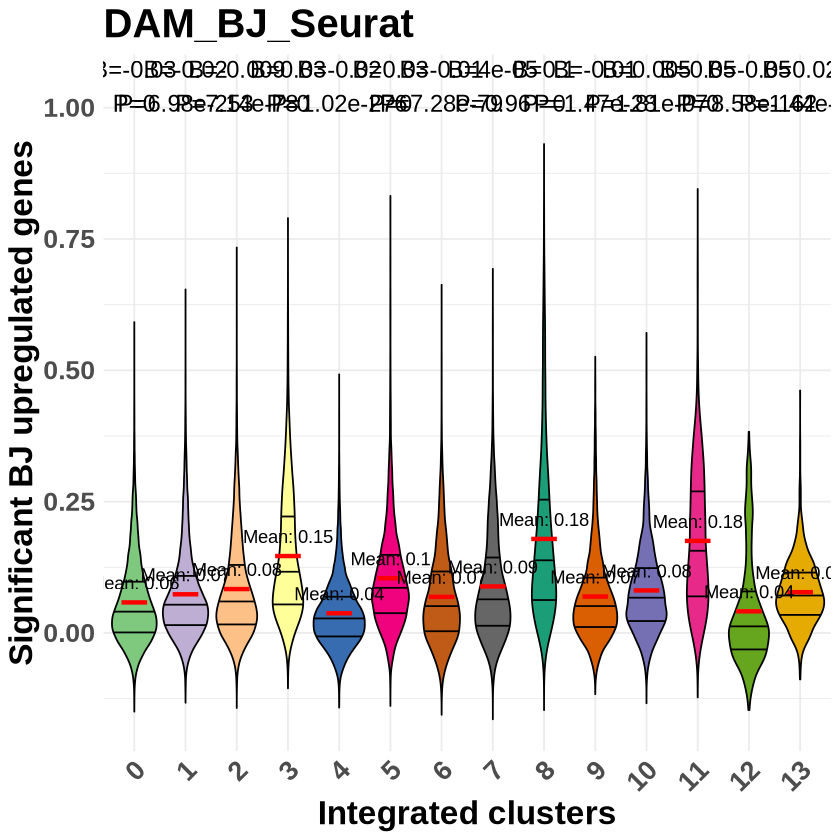

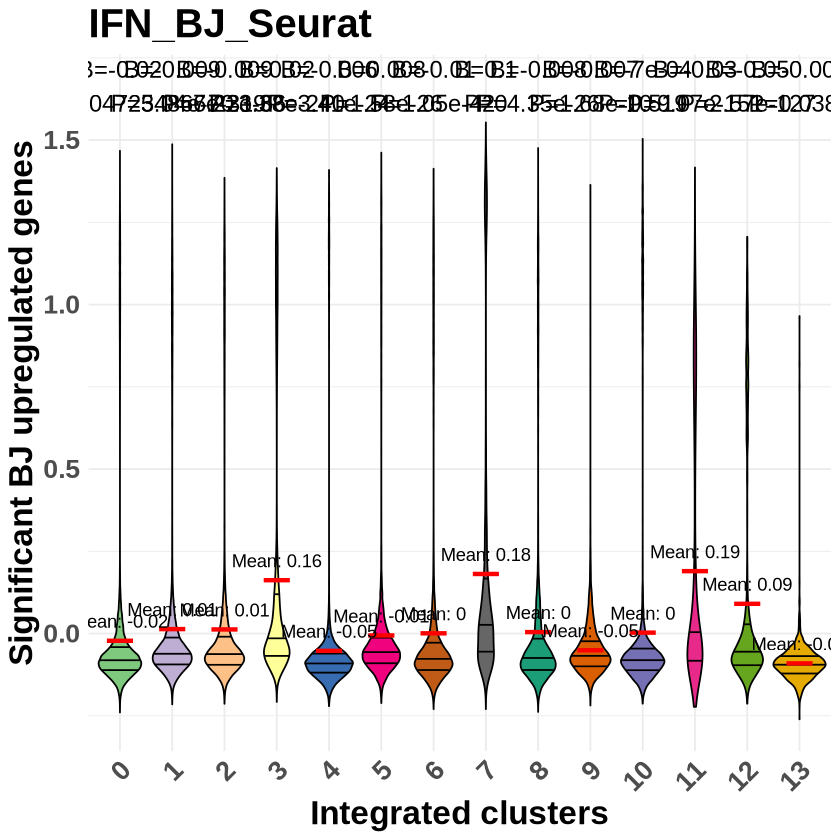

[[1]]
[1] "/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/BJ_Homeostatic_BJ_BJ_Seurat_genescore.pdf"

[[2]]
[1] "/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/BJ_MHCII_BJ_Seurat_genescore.pdf"

[[3]]
[1] "/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/BJ_DAM_BJ_Seurat_genescore.pdf"

[[4]]
[1] "/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/BJ_IFN_BJ_Seurat_genescore.pdf"

[[5]]
[1] "/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/BJ_IL1B_BJ_Seurat_genescore.pdf"

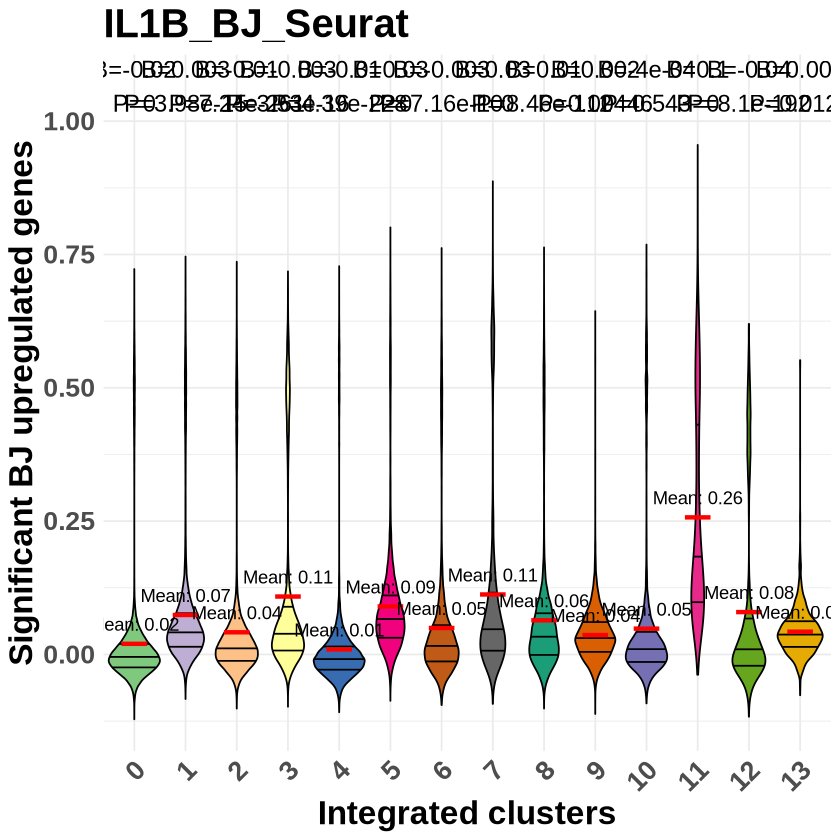

In [108]:

# BJ genescore

Idents(sobj_new) <- "cca_cluster"

geneSigPlots = lapply(1:length(c("Homeostatic_BJ","MHCII","DAM","IFN","IL1B")),function(ind){
nm = paste0(c("Homeostatic_BJ","MHCII","DAM","IFN","IL1B"),sep="_","BJ_Seurat")[ind]
  
  message(nm)
  df = data.frame(Cluster = sobj_new$seurat_clusters, Sig =  sobj_new@meta.data[,nm], Sample = sobj_new$Sample.ID) 
 # df <- subset(df, subset = (Sig > -0.1 & Sig < 0.1))
  df2 = df
  
  tmp = unlist(lapply(levels(df2$Cluster),function(cl){
    df2$cl = df2$Cluster == cl
    message(cl)
    re = lmer(Sig ~ cl + (1|Sample), data = df2)
   return(sprintf('B=%s\nP=%s',signif(summary(re)$coefficients[2,'Estimate'], digits=1),signif(summary(re)$coefficients[2,'Pr(>|t|)'], digits=3)))
      }))
 
 p = ggviolin(df2,x='Cluster',y='Sig',fill = 'Cluster',draw_quantiles=c(0.25,0.5,0.75),trim=T) +
   ggtitle(sprintf('%s',nm))+ 
   #geom_jitter(size=0.01,alpha =0.2)+ 
   stat_summary(fun = "mean", geom = "crossbar", width = 0.5, colour = "red")+
   stat_summary(fun = mean, geom = "text", col = "black", vjust = -1, aes(label = paste("Mean:", round(..y.., digits = 2)))) +
 ylab('Significant BJ upregulated genes') + xlab('Integrated clusters') + rremove('legend')  +theme_minimal()
   
 p = p + annotate("text", x = 1:2:3:4:5:6:7:8:9:10:11:12:13:14, y = max(df$Sig)+0.11, label = tmp, size = 5)+ theme(text = element_text(size = 12)) +
  scale_fill_manual(values=col_vector[c(1:14)])+ theme(text = element_text(size = 20, face = "bold"))
 p <- p+theme(axis.text.x = element_text(angle = 45, hjust = 1))+NoLegend()
plot(p)
ggsave(paste0("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/BJ_", nm, "_genescore.pdf"), height = 10, width = 20)
  })

geneSigPlots

KD genescore

In [157]:
# KD markers analysis
files = system('ls ~/integration_project/step_1/knight_micro_files/bh_nebula_compareSubclusters_microglia_[0,1,2,3,4]_all*txt',intern=T)
KD_art_marker  = lapply(files,function(f){
	tmp = read.table(f,stringsAsFactors=F,head=T,sep='\t')
	z = rownames(tmp[tmp$z.score > 0 & abs(tmp$logFC_cluster) > 0.25,])
	return(z)
})

names(KD_art_marker) <- c("Mic-resting", "Mic-activated", "Mic-reduced", "Mic-inflammatory", "Mic-stress")

KD_art_marker

$`Mic-resting`
  [1] "CX3CR1"       "C3"           "RASSF8"       "P2RY12"       "TMSB4X"      
  [6] "ADGRG1"       "KHDRBS3"      "RASGEF1C"     "LINC01684"    "ETV5"        
 [11] "SPNS2"        "RPLP1"        "AP003481.1"   "KCNMB1"       "SRGAP2-AS1"  
 [16] "C12orf75"     "RPL19"        "SLC12A9"      "PLAC8"        "FSCN1"       
 [21] "RPS24"        "PTCHD4"       "SUSD3"        "RNASEH2B-AS1" "CYTL1"       
 [26] "RPL23A"       "KCNMB2-AS1"   "RPL14"        "AL390729.1"   "RPL41"       
 [31] "NEFM"         "RPS11"        "C1RL"         "RPS4X"        "RPS23"       
 [36] "AC022509.2"   "LINC02381"    "CHCHD7"       "RPL8"         "LIPC"        
 [41] "AC023051.1"   "AC024257.1"   "ENC1"         "RPS27A"       "AC008892.1"  
 [46] "RPS25"        "ADGRG5"       "S100A4"       "CFAP74"       "RPL35"       
 [51] "MTRNR2L1"     "LMO1"         "BAIAP2L1"     "PPP1R35"      "OLFM1"       
 [56] "CLEC9A"       "CRYM"         "TREML1"       "AL157413.1"   "LINC00472"   
 [61] "IGF1"         "AC010978.1"   "AC022973.4"   "LINC01907"    "AL355472.1"  
 [66] "AC008731.1"   "DTD1"         "COA7"         "AP000439.3"   "SPDYE3"      
 [71] "LAPTM4B"      "MRPL4"        "RPS13"        "MKNK1-AS1"    "POLR1B"      
 [76] "RNF208"       "RFT1"         "AL109936.6"   "RAB39B"       "AL356805.1"  
 [81] "OOEP"         "TNFRSF25"     "AC069287.3"   "DUSP27"       "AP001628.1"  
 [86] "HCG25"        "EYS"          "NEFH"         "PLEKHG5"      "HCG22"       
 [91] "MAP4K1"       "HDHD2"        "MECOM"        "PCDH11Y"      "RAB3A"       
 [96] "CYP27C1"      "FOSL1"        "GSTM4"        "EFCAB14-AS1"  "AC211486.5"  
[101] "TGIF2-RAB5IF" "GNG3"         "RPS18"        "EPHA4"        "AC011043.1"  
[106] "IL12RB1"      "CATIP-AS2"    "SLC5A9"      

$`Mic-activated`
  [1] "ACSL1"          "PTPRG"          "CD163"          "DPYD"          
  [5] "DIRC3"          "MSR1"           "GPNMB"          "TPRG1"         
  [9] "STARD13"        "CPM"            "IQGAP2"         "NAMPT"         
 [13] "EYA2"           "KCNMA1"         "MITF"           "F13A1"         
 [17] "ATG7"           "SRGN"           "GNA13"          "SERPINE1"      
 [21] "SAT1"           "MYO1E"          "NHSL1"          "RGS1"          
 [25] "CDK14"          "SLC11A1"        "COLEC12"        "CXCR4"         
 [29] "TGFBI"          "FCHO2"          "SLC38A6"        "SIGLEC1"       
 [33] "HIF1A"          "AC100849.1"     "FMNL2"          "ELL2"          
 [37] "DUSP1"          "SH3PXD2A"       "SAMD4A"         "ZNF804A"       
 [41] "KCNE1"          "FMN1"           "PRKCE"          "ASAH1"         
 [45] "SPP1"           "CADM1"          "PRKAG2"         "C5AR1"         
 [49] "PPARG"          "ITSN1"          "ABCA1"          "FAM110B"       
 [53] "SDCBP"          "FPR3"           "ARHGAP18"       "TRHDE"         
 [57] "AP001636.3"     "NPL"            "CTSB"           "SGK1"          
 [61] "KLHL6"          "GLDN"           "MERTK"          "PDE4B"         
 [65] "MCTP1"          "GAS7"           "RBM47"          "DMXL2"         
 [69] "ATP1B3"         "UBXN2B"         "PADI2"          "TNFRSF1B"      
 [73] "MTSS1"          "RAPGEF1"        "ADGRG6"         "CD83"          
 [77] "MAN1A1"         "SH3BP5"         "CEBPD"          "FNDC3A"        
 [81] "AP002991.1"     "ITGA4"          "ARID5B"         "CREM"          
 [85] "LPL"            "HERPUD1"        "TANC2"          "PLXNC1"        
 [89] "CD44"           "PEAK1"          "MAFB"           "PTPRM"         
 [93] "SDC2"           "EPB41L3"        "PLAUR"          "FNDC3B"        
 [97] "FNIP2"          "NR4A3"          "TNS1"           "IFI44L"        
[101] "RAB20"          "THEMIS2"        "ABCC3"          "ADARB1"        
[105] "C20orf194"      "CEMIP2"         "ARHGAP10"       "GRAMD4"        
[109] "ASAP1"          "ZNF331"         "FAM49A"         "GPD2"          
[113] "MGAT1"          "MYO9B"          "ALOX15B"        "AZI2"          
[117] "DAPK1"          "OLR1"           "SPIRE1"         "PDE3B"     

In [158]:
lapply(KD_art_marker, length) %>% as.data.frame()

Mic.resting Mic.activated Mic.reduced Mic.inflammatory Mic.stress
1 108         717           163         413              724

In [113]:
## Genescore - KD markers analysis with Seurat
sobj_new = AddModuleScore(sobj_new,KD_art_marker,name="KD_Seurat")

colnames(sobj_new@meta.data)[grep("KD_Seurat",colnames(sobj_new@meta.data))] = 
paste0(c("Mic-resting", "Mic-activated", "Mic-reduced", "Mic-inflammatory", "Mic-stress"),sep="_","KD_Seurat")

Mic-resting_KD_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements: only

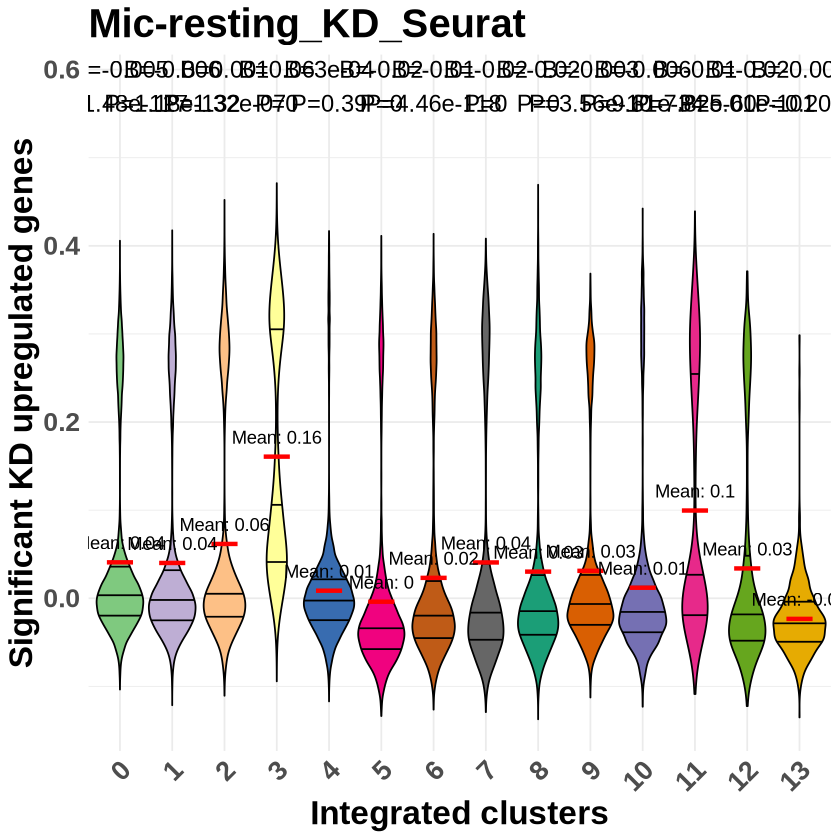

Mic-inflammatory_KD_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements:

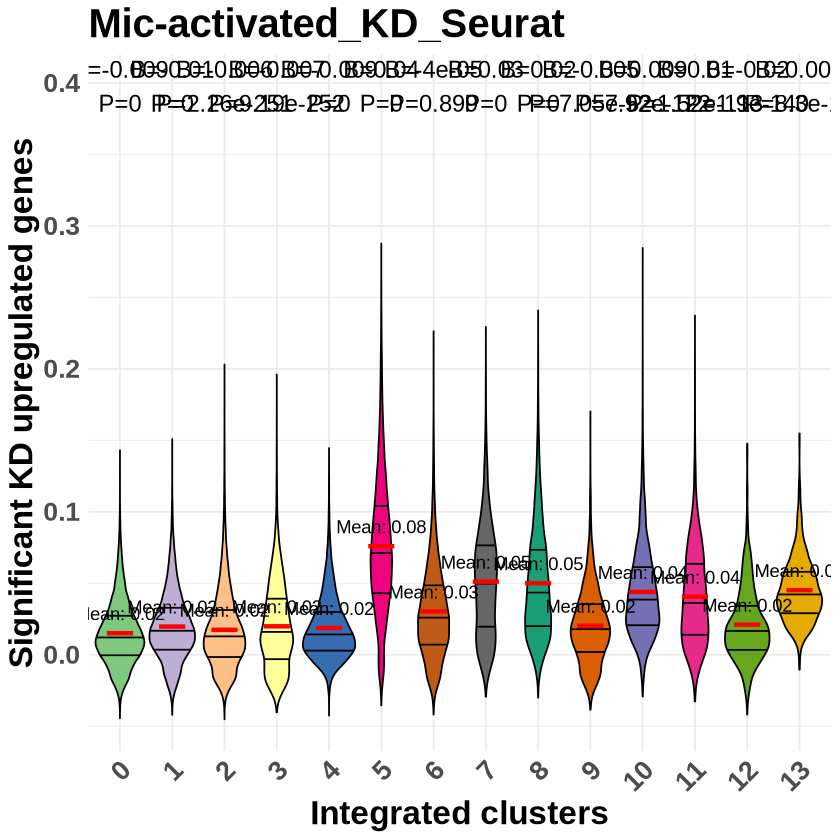

Mic-stress_KD_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements: only 

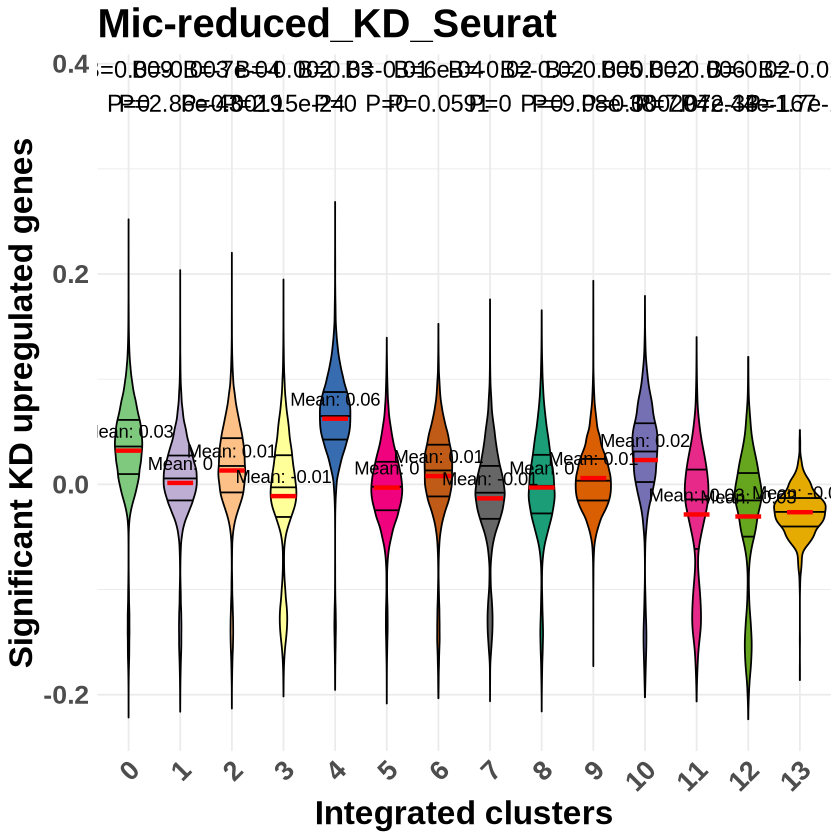

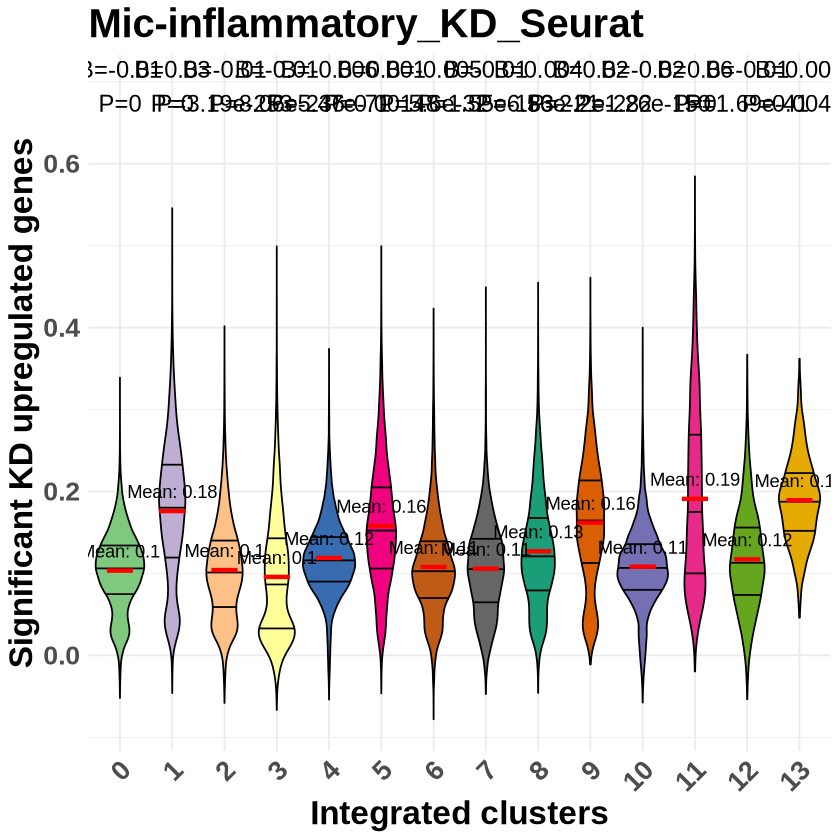

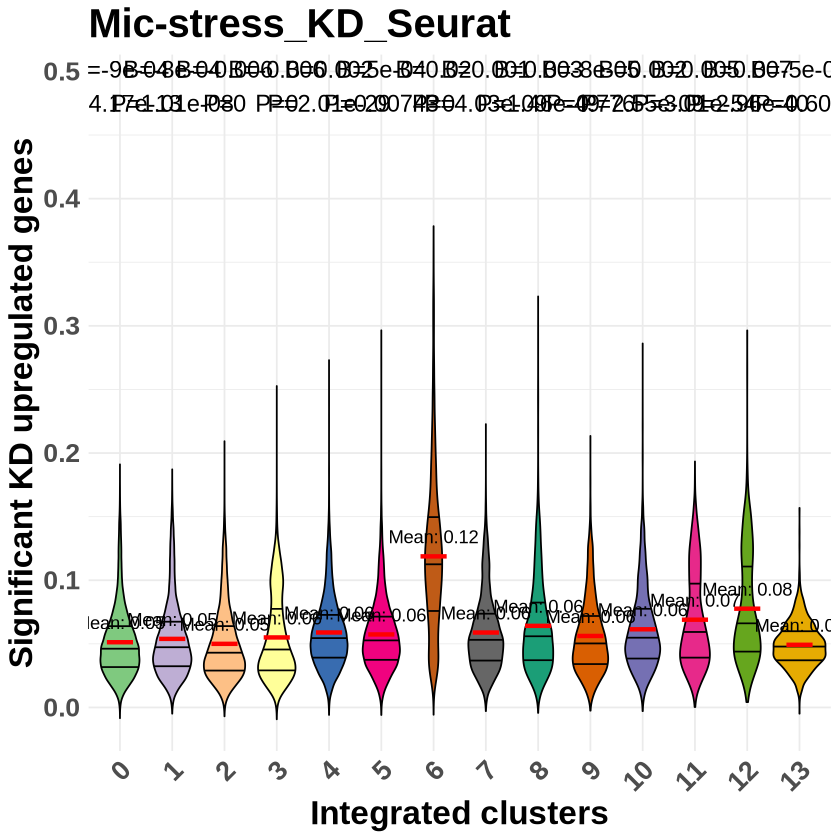

In [115]:

# KD genescore

Idents(sobj_new) <- "cca_cluster"

geneSigPlots = lapply(1:length(c("Mic-resting", "Mic-activated", "Mic-reduced", "Mic-inflammatory", "Mic-stress")),function(ind){
nm = paste0(c("Mic-resting", "Mic-activated", "Mic-reduced", "Mic-inflammatory", "Mic-stress"),sep="_","KD_Seurat")[ind]
  
  message(nm)
  df = data.frame(Cluster = sobj_new$seurat_clusters, Sig =  sobj_new@meta.data[,nm], Sample = sobj_new$Sample.ID) 
 # df <- subset(df, subset = (Sig > -0.1 & Sig < 0.1))
  df2 = df
  
  tmp = unlist(lapply(levels(df2$Cluster),function(cl){
    df2$cl = df2$Cluster == cl
    message(cl)
    re = lmer(Sig ~ cl + (1|Sample), data = df2)
   return(sprintf('B=%s\nP=%s',signif(summary(re)$coefficients[2,'Estimate'], digits=1),signif(summary(re)$coefficients[2,'Pr(>|t|)'], digits=3)))
      }))
 
 p = ggviolin(df2,x='Cluster',y='Sig',fill = 'Cluster',draw_quantiles=c(0.25,0.5,0.75),trim=T) +
   ggtitle(sprintf('%s',nm))+ 
   #geom_jitter(size=0.01,alpha =0.2)+ 
   stat_summary(fun = "mean", geom = "crossbar", width = 0.5, colour = "red")+
   stat_summary(fun = mean, geom = "text", col = "black", vjust = -1, aes(label = paste("Mean:", round(..y.., digits = 2)))) +
 ylab('Significant KD upregulated genes') + xlab('Integrated clusters') + rremove('legend')  +theme_minimal()
   
 p = p + annotate("text", x = 1:2:3:4:5:6:7:8:9:10:11:12:13:14, y = max(df$Sig)+0.11, label = tmp, size = 5)+ theme(text = element_text(size = 12)) +
  scale_fill_manual(values=col_vector[c(1:14)])+ theme(text = element_text(size = 20, face = "bold"))
 p <- p+theme(axis.text.x = element_text(angle = 45, hjust = 1))+NoLegend()
plot(p)
ggsave(paste0("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/KD_", nm, "_genescore.pdf"), height = 10, width = 20)
  })

In [159]:
# # DOTPOTS - MD markers analysis
MD_art_marker  <- read_excel("~/integration_project/step_1/41593_2022_1131_MOESM4_ESM.xlsx", sheet = 7)

MD_gene_list <- lapply(unique(MD_art_marker$cluster), function(x){
gene <- MD_art_marker$gene[MD_art_marker$cluster == x & MD_art_marker$avg_log2FC > 0.25]
return(gene)
})

names(MD_gene_list) <- c("CXCL10_Interferon","Interferon", "SPP1+","P53","Metallothonine","Homeostatic-MD","Proliferative","Chemokine", "CCL13_Chemokine")

MD_gene_list

$CXCL10_Interferon
  [1] "CXCL10"    "IFIT1"     "IFIT3"     "IFI6"      "HLA-A"     "RSAD2"    
  [7] "OAS1"      "MX1"       "C3"        "TNFSF10"   "HLA-B"     "CKB"      
 [13] "MX2"       "SAT1"      "LY6E"      "OASL"      "NUPR1"     "BST2"     
 [19] "DDX58"     "DDX60L"    "TNFSF13B"  "LGALS3BP"  "EPSTI1"    "LEFTY2"   
 [25] "RNF213"    "CDKN1C"    "STAT1"     "PLPP1"     "IFI44"     "UBE2L6"   
 [31] "IFI35"     "CMPK2"     "ISG20"     "MARCKS"    "IFIT2"     "DRAP1"    
 [37] "MT2A"      "PSMB9"     "IFIH1"     "SAMD9"     "OAS3"      "COL1A2"   
 [43] "RARRES3"   "TYROBP"    "PLD4"      "PPM1K"     "CXXC5"     "MS4A7"    
 [49] "MDFI"      "IFITM1"    "APOL6"     "CLIC4"     "ADAMTS6"   "SPARC"    
 [55] "SOX4"      "RTCB"      "PLD3"      "TFPI"      "SAMD9L"    "OPTN"     
 [61] "C21orf91"  "RTP4"      "C19orf66"  "AEBP1"     "RHOB"      "DDX60"    
 [67] "USP18"     "CTSH"      "TAP1"      "GBP3"      "SERPINF1"  "MUM1"     
 [73] "TRANK1"    "IL32"      "HES1"      "COL1A1"    "HELZ2"     "CASP4"    
 [79] "PMEPA1"    "RABGAP1L"  "TMEM176B"  "FILIP1L"   "HES4"      "SMCHD1"   
 [85] "HERC6"     "ID2"       "NUB1"      "PNRC1"     "CCDC85B"   "SOCS1"    
 [91] "MARCKSL1"  "MRC2"      "TXNIP"     "MDK"       "IER2"      "GBP1"     
 [97] "VAMP5"     "CLEC7A"    "IRF1"      "C15orf48"  "TMEM176A"  "GABARAPL1"
[103] "MAFB"      "JUNB"      "FYB1"      "MYL4"      "IER3"      "BTG1"     
[109] "RARRES2"  

$Interferon
  [1] "CDKN1C"    "LEFTY2"    "NUPR1"     "IFI6"      "C3"        "CKB"      
  [7] "PROC"      "FILIP1L"   "SOX4"      "COL1A1"    "IFIT1"     "PLPP1"    
 [13] "SAMD9"     "RSAD2"     "ADAMTS6"   "MDFI"      "S100A4"    "DDX58"    
 [19] "SERPINF1"  "COL1A2"    "RHOB"      "IFI44"     "OASL"      "SPARC"    
 [25] "HSPB1"     "IFIT3"     "CXXC5"     "OAS1"      "LGALS3BP"  "DDX60L"   
 [31] "OAS3"      "LY6E"      "HLA-A"     "DRAP1"     "MX1"       "BST2"     
 [37] "STAT1"     "RPS12"     "MUM1"      "MX2"       "C21orf91"  "RTCB"     
 [43] "MS4A7"     "PPM1K"     "UBE2L6"    "RARRES3"   "PDLIM7"    "GLIPR1"   
 [49] "RNF213"    "PLD4"      "SLC38A2"   "CLIC4"     "ITGAV"     "PMEPA1"   
 [55] "TPM1"      "AEBP1"     "CTSD"      "TRANK1"    "PEBP1"     "C19orf66" 
 [61] "EPSTI1"    "TYROBP"    "IFI35"     "C5orf46"   "GBP3"      "SAT1"     
 [67] "RTP4"      "OLFM2"     "BASP1"     "CAPG"      "SP100"     "ZFAS1"    
 [73] "MRPS6"     "RABGAP1L"  "PSMB9"     "GABARAPL1" "CCDC85B"   "TFPI"     
 [79] "ASS1"      "IER5L"     "APOL6"     "CMPK2"     "HES1"      "PTMS"     
 [85] "PKM"       "TNFRSF12A" "SKIL"      "C15orf48"  "KCNQ1OT1"  "GALNT2"   
 [91] "XAF1"      "JAG1"      "SMCHD1"    "ACTG1"     "ATP5F1D"   "SHISA5"   
 [97] "GPX4"      "COX7B"     "ID2"       "IFITM1"    "NDUFB4"    "PDLIM1"   
[103] "MYL4"      "RCN1"      "FZD2"      "LDHB"      "ADAM28"    "SLC46A3"  
[109] "HELZ2"     "TXNIP"     "CLDN1"     "SSBP2"     "PPP1R14B"  "KRT8"     
[115] "MAP4"      "IER3"      "HERC6"     "CHRNA1"    "FSTL3"     "TAX1BP3"  
[121] "C4orf3"    "SLC5A3"    "PNRC1"     "USP18"     "GRID2"     "CASP4"    
[127] "MAP3K2"    "TAGLN"     "SPRY1"     "TM7SF2"    "PALLD"     "PSMB8"    
[133] "NCF4"      "UBL3"      "RALA"      "SMURF2"    "ATP6AP1"   "HCFC1R1"  
[139] "ERCC1"     "DDX60"     "CNP"       "GTF2I"     "MXD4"      "LOXL1"    
[145] "CARD16"    "TRIM38"    "LMCD1"     "NR2F6"     "TTYH3"     "HES4"     
[151] "IER2"      "CXCR4"     "IFIT5"     "CTSH"      "LGALS1"    "TNFSF13B" 
[157] "COL5A1"    "CYR61"     "MEF2C"     "DUSP1"     "TNFSF10"   "JUNB"     
[163] "MAFB"      "SLC26A2"   "ID3"       "RARRES2"   "TMEM176B" 

$`SPP1+`
  [1] "SPP1"       "LGALS1"     "S100A4"     "SH3BGRL3"   "FCER1G"    
  [6] "VIM"        "CAPG"       "ALOX5AP"    "IFI6"       "GAPDH"     
 [11] "CLDN1"      "CTSD"       "PKM"        "CORO1A"     "CKLF"      
 [16] "LDHA"       "TUBA1A"     "S100A10"    "C3"         "CMTM3"     
 [21] "PDLIM7"     "PRDX1"      "MSN"        "HTRA1"      "PLAUR"     
 [26] "LM

In [160]:
lapply(MD_gene_list, length) %>% as.data.frame()

CXCL10_Interferon Interferon SPP1. P53 Metallothonine Homeostatic.MD
1 109               167        215   370 18             109           
  Proliferative Chemokine CCL13_Chemokine
1 739           76        350

In [117]:

## Genescore - MD markers analysis with Seurat
sobj_new = AddModuleScore(sobj_new,MD_gene_list[c(1,2,3,6,8,9)],name="MD_Seurat")

colnames(sobj_new@meta.data)[grep("MD_Seurat",colnames(sobj_new@meta.data))] = 
paste0(c("CXCL10_Interferon","Interferon", "SPP1+","Homeostatic-MD","Chemokine", "CCL13_Chemokine"),sep="_","MD_Seurat")

Warning message:
“The following features are not present in the object: 44256, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: 44256, 44445, not searching for symbol synonyms”


CXCL10_Interferon_MD_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements

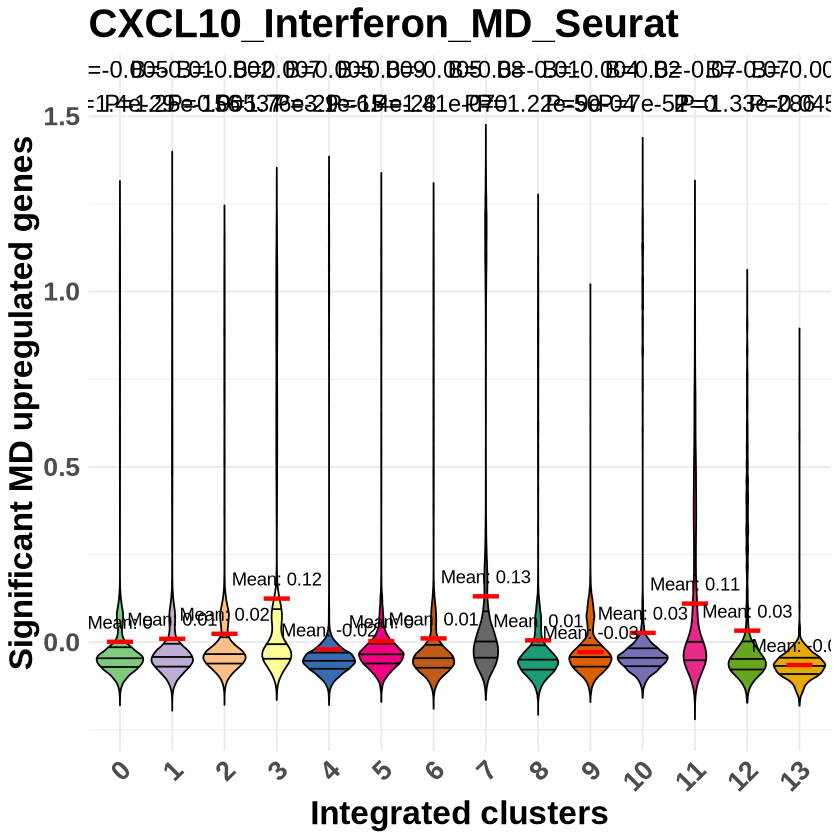

Homeostatic-MD_MD_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements: o

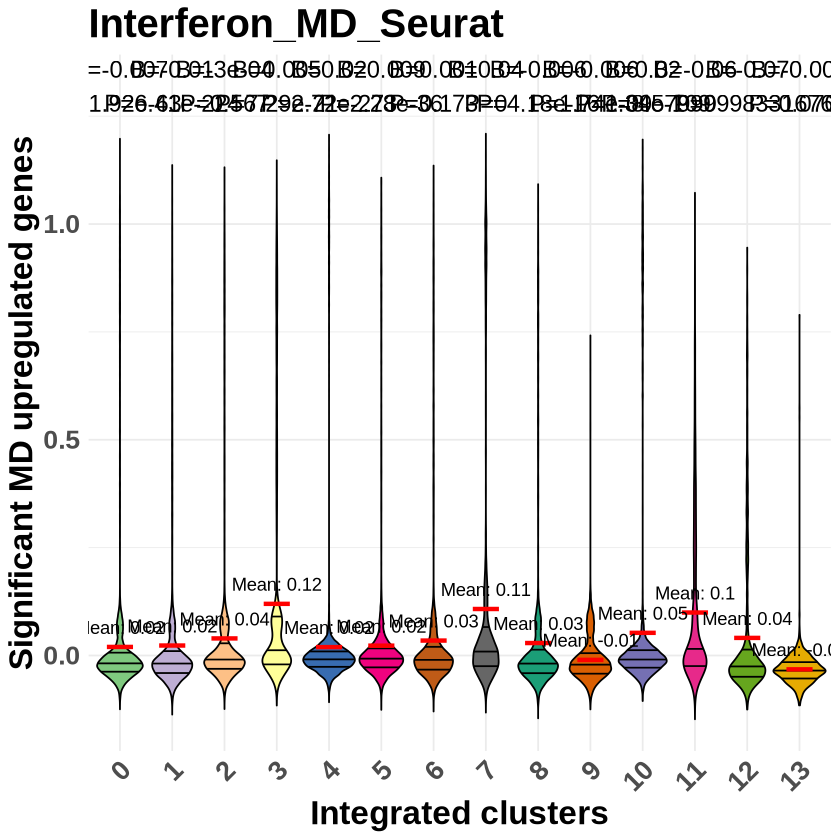

Chemokine_MD_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements: only t

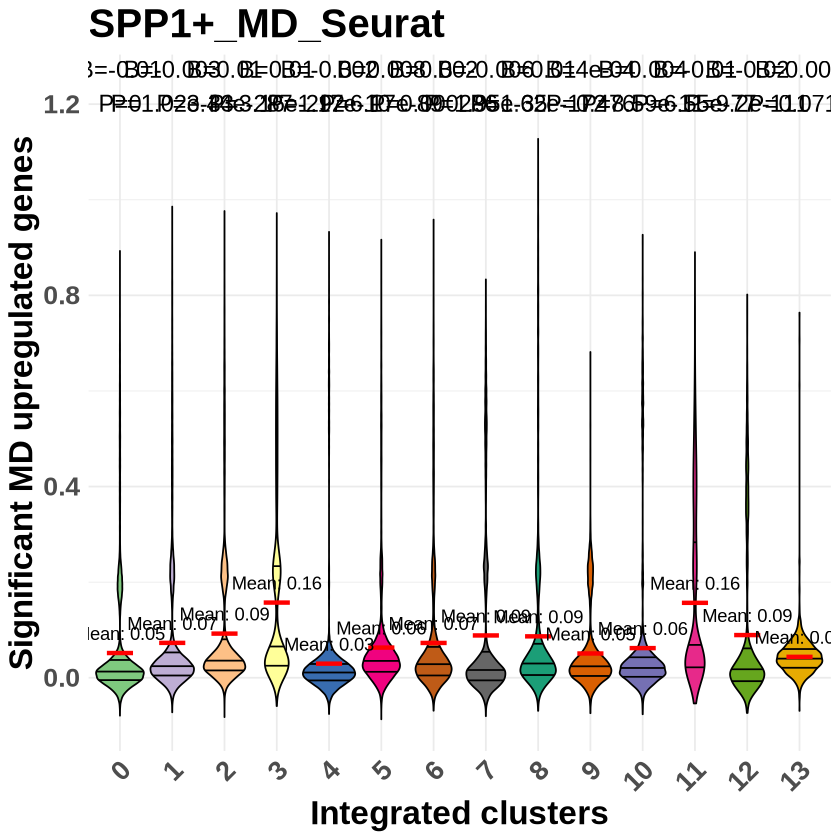

CCL13_Chemokine_MD_Seurat

0

1

2

3

4

5

6

7

8

9

10

11

12

13

Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements: 

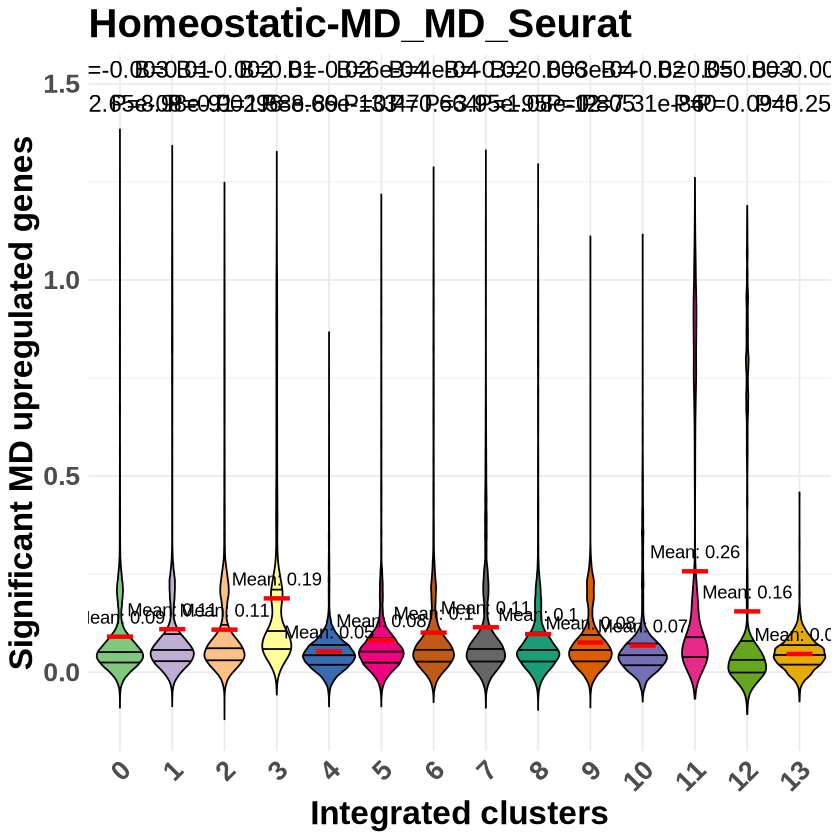

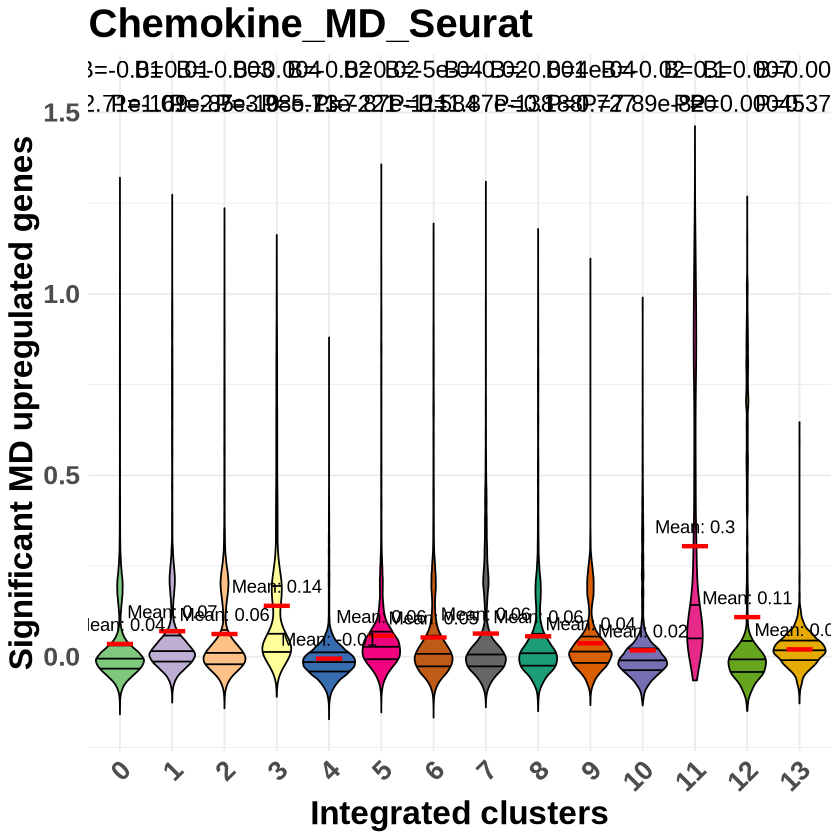

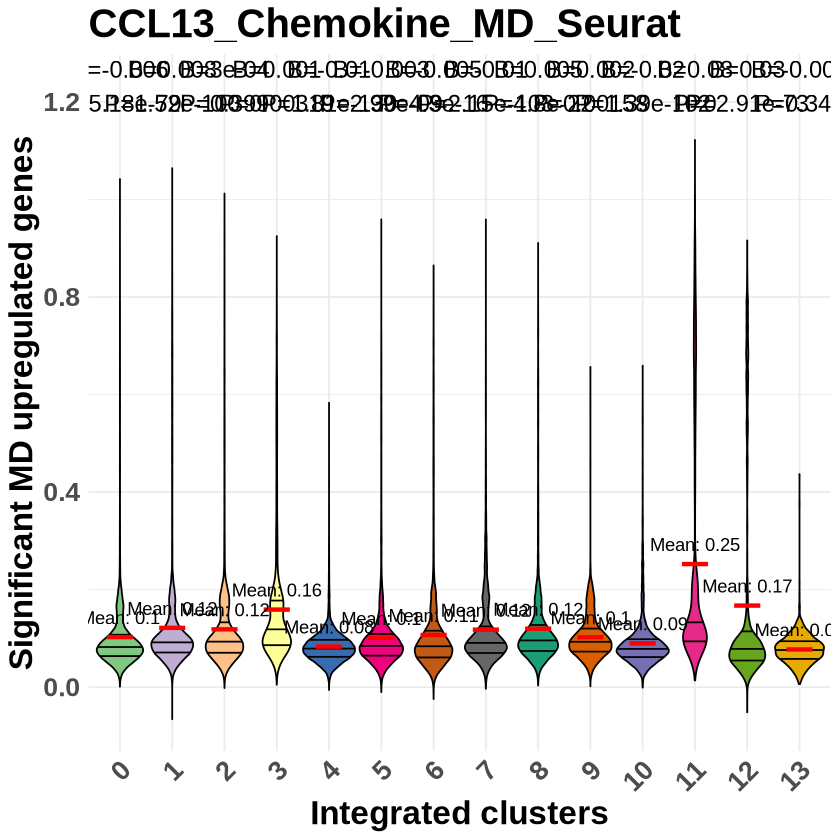

In [118]:
# MD genescore

Idents(sobj_new) <- "cca_cluster"

geneSigPlots = lapply(1:length(c("CXCL10_Interferon","Interferon", "SPP1+","Homeostatic-MD","Chemokine", "CCL13_Chemokine")),function(ind){
nm = paste0(c("CXCL10_Interferon","Interferon", "SPP1+","Homeostatic-MD","Chemokine", "CCL13_Chemokine"),sep="_","MD_Seurat")[ind]
  
  message(nm)
  df = data.frame(Cluster = sobj_new$seurat_clusters, Sig =  sobj_new@meta.data[,nm], Sample = sobj_new$Sample.ID) 
 # df <- subset(df, subset = (Sig > -0.1 & Sig < 0.1))
  df2 = df
  
  
  tmp = unlist(lapply(levels(df2$Cluster),function(cl){
    df2$cl = df2$Cluster == cl
    message(cl)
    re = lmer(Sig ~ cl + (1|Sample), data = df2)
   return(sprintf('B=%s\nP=%s',signif(summary(re)$coefficients[2,'Estimate'], digits=1),signif(summary(re)$coefficients[2,'Pr(>|t|)'], digits=3)))
      }))
 
 p = ggviolin(df2,x='Cluster',y='Sig',fill = 'Cluster',draw_quantiles=c(0.25,0.5,0.75),trim=T) +
   ggtitle(sprintf('%s',nm))+ 
   #geom_jitter(size=0.01,alpha =0.2)+ 
   stat_summary(fun = "mean", geom = "crossbar", width = 0.5, colour = "red")+
   stat_summary(fun = mean, geom = "text", col = "black", vjust = -1, aes(label = paste("Mean:", round(..y.., digits = 2)))) +
 ylab('Significant MD upregulated genes') + xlab('Integrated clusters') + rremove('legend')  +theme_minimal()
   
 p = p + annotate("text", x = 1:2:3:4:5:6:7:8:9:10:11:12:13:14, y = max(df$Sig)+0.11, label = tmp, size = 5)+ theme(text = element_text(size = 12)) +
  scale_fill_manual(values=col_vector[c(1:14)])+ theme(text = element_text(size = 20, face = "bold"))
 p <- p+theme(axis.text.x = element_text(angle = 45, hjust = 1))+NoLegend()
plot(p)
ggsave(paste0("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/MD_", nm, "_genescore.pdf"), height = 10, width = 20)
  })

In [125]:
qsave(sobj_new,"/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta_genescore.qs", nthreads = 6)

Cleaning of cluster 3

In [52]:
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta.qs", nthreads = 6)

In [48]:
sobj_new

An object of class Seurat 
64798 features across 222822 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

In [53]:
sobj_new <- subset(sobj_new, subset = cca_cluster == 3 & Cell_type == "Homeostatic-MD", invert = TRUE)
sobj_new <- subset(sobj_new, subset = cca_cluster == 3 & Cell_type == "CXCL10_Interferon", invert = TRUE)
sobj_new <- subset(sobj_new, subset = cca_cluster == 3 & Cell_type == "Interferon", invert = TRUE)

In [57]:
table(sobj_new$cca_cluster)


    0     1    10    11    12    13     2     3     4     5     6     7     8 
46705 35571  5572  4201  1723  1479 26385 18843 19277 15017 14814 12018 11542 
    9 
 6686 

In [61]:
sobj_new <- subset(sobj_new, subset = cca_cluster == 9, invert = TRUE)
sobj_new <- subset(sobj_new, subset = cca_cluster == 10, invert = TRUE)

In [ ]:
sobj_new$cca_cluster <- droplevels(sobj_new$cca_cluster)

In [64]:
table(sobj_new$cca_cluster)


    0     1    11    12    13     2     3     4     5     6     7     8 
46705 35571  4201  1723  1479 26385 18843 19277 15017 14814 12018 11542 

In [65]:
# KD markers analysis
files = system('ls ~/integration_project/step_1/knight_micro_files/bh_nebula_compareSubclusters_microglia_[0,1,2,3,4]_all*txt',intern=T)
KD_art_marker  = lapply(files,function(f){
	tmp = read.table(f,stringsAsFactors=F,head=T,sep='\t')
	z = rownames(tmp[tmp$z.score > 0 & abs(tmp$logFC_cluster) > 0.25,])
	return(z)
})

names(KD_art_marker) <- c("Mic-resting", "Mic-activated", "Mic-reduced", "Mic-inflammatory", "Mic-stress")

KD_art_marker

$`Mic-resting`
  [1] "CX3CR1"       "C3"           "RASSF8"       "P2RY12"       "TMSB4X"      
  [6] "ADGRG1"       "KHDRBS3"      "RASGEF1C"     "LINC01684"    "ETV5"        
 [11] "SPNS2"        "RPLP1"        "AP003481.1"   "KCNMB1"       "SRGAP2-AS1"  
 [16] "C12orf75"     "RPL19"        "SLC12A9"      "PLAC8"        "FSCN1"       
 [21] "RPS24"        "PTCHD4"       "SUSD3"        "RNASEH2B-AS1" "CYTL1"       
 [26] "RPL23A"       "KCNMB2-AS1"   "RPL14"        "AL390729.1"   "RPL41"       
 [31] "NEFM"         "RPS11"        "C1RL"         "RPS4X"        "RPS23"       
 [36] "AC022509.2"   "LINC02381"    "CHCHD7"       "RPL8"         "LIPC"        
 [41] "AC023051.1"   "AC024257.1"   "ENC1"         "RPS27A"       "AC008892.1"  
 [46] "RPS25"        "ADGRG5"       "S100A4"       "CFAP74"       "RPL35"       
 [51] "MTRNR2L1"     "LMO1"         "BAIAP2L1"     "PPP1R35"      "OLFM1"       
 [56] "CLEC9A"       "CRYM"         "TREML1"       "AL157413.1"   "LINC00472"   
 [61] "IGF1"         "AC010978.1"   "AC022973.4"   "LINC01907"    "AL355472.1"  
 [66] "AC008731.1"   "DTD1"         "COA7"         "AP000439.3"   "SPDYE3"      
 [71] "LAPTM4B"      "MRPL4"        "RPS13"        "MKNK1-AS1"    "POLR1B"      
 [76] "RNF208"       "RFT1"         "AL109936.6"   "RAB39B"       "AL356805.1"  
 [81] "OOEP"         "TNFRSF25"     "AC069287.3"   "DUSP27"       "AP001628.1"  
 [86] "HCG25"        "EYS"          "NEFH"         "PLEKHG5"      "HCG22"       
 [91] "MAP4K1"       "HDHD2"        "MECOM"        "PCDH11Y"      "RAB3A"       
 [96] "CYP27C1"      "FOSL1"        "GSTM4"        "EFCAB14-AS1"  "AC211486.5"  
[101] "TGIF2-RAB5IF" "GNG3"         "RPS18"        "EPHA4"        "AC011043.1"  
[106] "IL12RB1"      "CATIP-AS2"    "SLC5A9"      

$`Mic-activated`
  [1] "ACSL1"          "PTPRG"          "CD163"          "DPYD"          
  [5] "DIRC3"          "MSR1"           "GPNMB"          "TPRG1"         
  [9] "STARD13"        "CPM"            "IQGAP2"         "NAMPT"         
 [13] "EYA2"           "KCNMA1"         "MITF"           "F13A1"         
 [17] "ATG7"           "SRGN"           "GNA13"          "SERPINE1"      
 [21] "SAT1"           "MYO1E"          "NHSL1"          "RGS1"          
 [25] "CDK14"          "SLC11A1"        "COLEC12"        "CXCR4"         
 [29] "TGFBI"          "FCHO2"          "SLC38A6"        "SIGLEC1"       
 [33] "HIF1A"          "AC100849.1"     "FMNL2"          "ELL2"          
 [37] "DUSP1"          "SH3PXD2A"       "SAMD4A"         "ZNF804A"       
 [41] "KCNE1"          "FMN1"           "PRKCE"          "ASAH1"         
 [45] "SPP1"           "CADM1"          "PRKAG2"         "C5AR1"         
 [49] "PPARG"          "ITSN1"          "ABCA1"          "FAM110B"       
 [53] "SDCBP"          "FPR3"           "ARHGAP18"       "TRHDE"         
 [57] "AP001636.3"     "NPL"            "CTSB"           "SGK1"          
 [61] "KLHL6"          "GLDN"           "MERTK"          "PDE4B"         
 [65] "MCTP1"          "GAS7"           "RBM47"          "DMXL2"         
 [69] "ATP1B3"         "UBXN2B"         "PADI2"          "TNFRSF1B"      
 [73] "MTSS1"          "RAPGEF1"        "ADGRG6"         "CD83"          
 [77] "MAN1A1"         "SH3BP5"         "CEBPD"          "FNDC3A"        
 [81] "AP002991.1"     "ITGA4"          "ARID5B"         "CREM"          
 [85] "LPL"            "HERPUD1"        "TANC2"          "PLXNC1"        
 [89] "CD44"           "PEAK1"          "MAFB"           "PTPRM"         
 [93] "SDC2"           "EPB41L3"        "PLAUR"          "FNDC3B"        
 [97] "FNIP2"          "NR4A3"          "TNS1"           "IFI44L"        
[101] "RAB20"          "THEMIS2"        "ABCC3"          "ADARB1"        
[105] "C20orf194"      "CEMIP2"         "ARHGAP10"       "GRAMD4"        
[109] "ASAP1"          "ZNF331"         "FAM49A"         "GPD2"          
[113] "MGAT1"          "MYO9B"          "ALOX15B"        "AZI2"          
[117] "DAPK1"          "OLR1"           "SPIRE1"         "PDE3B"     

In [66]:
## Genescore - KD markers analysis with Seurat homeosatic
sobj_new = AddModuleScore(sobj_new,KD_art_marker[1],name="KD_Seurat")

colnames(sobj_new@meta.data)[grep("KD_Seurat",colnames(sobj_new@meta.data))] = 
paste0(c("Mic-resting"),sep="_","KD_Seurat")

In [67]:
# MD genescore

df = data.frame(Cluster = sobj_new$cca_cluster, Sig =  sobj_new$'Mic-resting_KD_Seurat', Sample = sobj_new$Sample.ID)
 # df <- subset(df, subset = (Sig > -0.1 & Sig < 0.1))
  df2 = df
  
  
  tmp = unlist(lapply(levels(df2$Cluster),function(cl){
    df2$cl = df2$Cluster == cl
    message(cl)
    re = lmer(Sig ~ cl + (1|Sample), data = df2)
   return(sprintf('B=%s\nP=%s',signif(summary(re)$coefficients[2,'Estimate'], digits=1),signif(summary(re)$coefficients[2,'Pr(>|t|)'], digits=3)))
      }))
 

0

1

11

12

13

2

3

4

5

6

7

8



Warning message in 1:2:3:
“numerical expression has 2 elements: only the first used”
Warning message in 1:2:3:4:
“numerical expression has 3 elements: only the first used”
Warning message in 1:2:3:4:5:
“numerical expression has 4 elements: only the first used”
Warning message in 1:2:3:4:5:6:
“numerical expression has 5 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:
“numerical expression has 6 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:
“numerical expression has 7 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:
“numerical expression has 8 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:
“numerical expression has 9 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:
“numerical expression has 10 elements: only the first used”
Warning message in 1:2:3:4:5:6:7:8:9:10:11:12:
“numerical expression has 11 elements: only the first used”


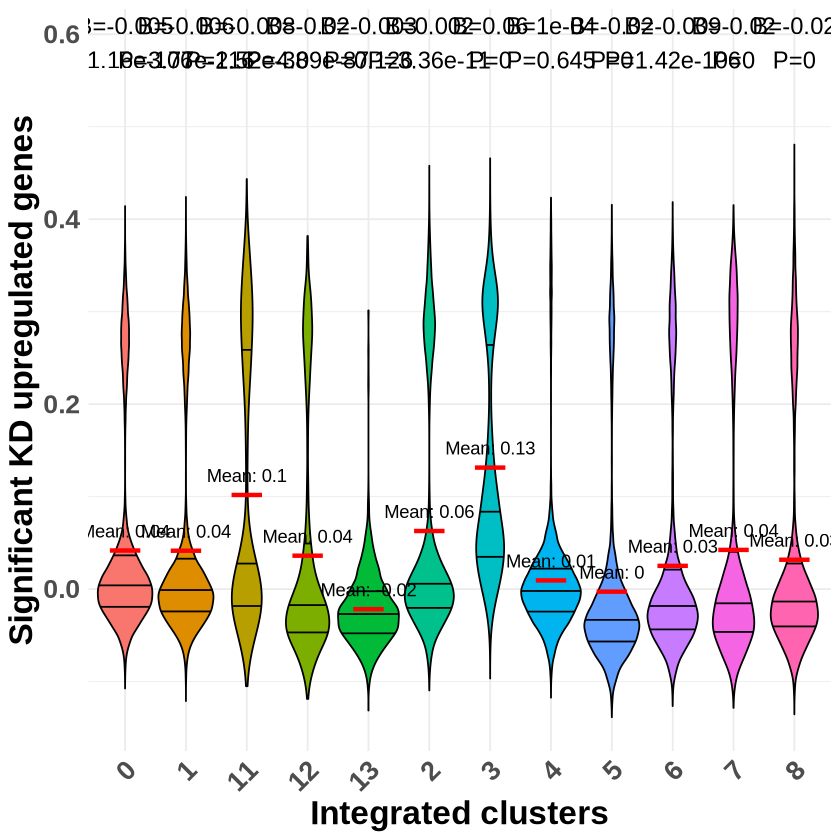

In [69]:

 p = ggviolin(df2,x='Cluster',y='Sig',fill = 'Cluster',draw_quantiles=c(0.25,0.5,0.75),trim=T) +
   #ggtitle(sprintf('%s',nm))+ 
   #geom_jitter(size=0.01,alpha =0.2)+ 
   stat_summary(fun = "mean", geom = "crossbar", width = 0.5, colour = "red")+
   stat_summary(fun = mean, geom = "text", col = "black", vjust = -1, aes(label = paste("Mean:", round(..y.., digits = 2)))) +
 ylab('Significant KD upregulated genes') + xlab('Integrated clusters') + rremove('legend')  +theme_minimal()
   
 p = p + annotate("text", x = 1:2:3:4:5:6:7:8:9:10:11:12, y = max(df$Sig)+0.11, label = tmp, size = 5)+ theme(text = element_text(size = 12)) +
  theme(text = element_text(size = 20, face = "bold"))
 p <- p+theme(axis.text.x = element_text(angle = 45, hjust = 1))+NoLegend()
p
ggsave(paste0("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/genescore_plot/check","_genescore.pdf"), height = 10, width = 20)

Integrated Cell type Annotation

In [71]:
sobj_new$Integrated_cell_type <- sobj_new$cca_cluster
sobj_new$Integrated_cell_type  <- ifelse(sobj_new$Integrated_cell_type==0,"Homeostatic",
                          ifelse(sobj_new$Integrated_cell_type ==1,"Inflammatory_I",
                                 ifelse(sobj_new$Integrated_cell_type ==2,"Neuronal_Surveillance",
                                        ifelse(sobj_new$Integrated_cell_type ==3,"MHCII",
                                               ifelse(sobj_new$Integrated_cell_type==4,"Mic-reduced",
                                                      ifelse(sobj_new$Integrated_cell_type ==5,"Inflammatory_II",
                                                             ifelse(sobj_new$Integrated_cell_type ==6,"Stress_Signature",
                                                             ifelse(sobj_new$Integrated_cell_type ==7,"IFN",
                                                             ifelse(sobj_new$Integrated_cell_type ==8,"Activated",
                                                             ifelse(sobj_new$Integrated_cell_type ==11,"Inflammatory_III",
                                                             ifelse(sobj_new$Integrated_cell_type ==12,"Cycling","Lipid_Processing")))))))))))

In [74]:
table(sobj_new$cca_cluster,sobj_new$Integrated_cell_type)

    
     Activated Cycling Homeostatic   IFN Inflammatory_I Inflammatory_II
  0          0       0       46705     0              0               0
  1          0       0           0     0          35571               0
  11         0       0           0     0              0               0
  12         0    1723           0     0              0               0
  13         0       0           0     0              0               0
  2          0       0           0     0              0               0
  3          0       0           0     0              0               0
  4          0       0           0     0              0               0
  5          0       0           0     0              0           15017
  6          0       0           0     0              0               0
  7          0       0           0 12018              0               0
  8      11542       0           0     0              0               0
    
     Inflammatory_III Lipid_Processing MHCII Mic-reduc

In [75]:
qsave(sobj_new,"/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_cells.qs", nthreads = 6)

In [148]:
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_cells.qs", nthreads = 6)

In [149]:
BJ_cell_type <- c("Homeostatic-BJ", "Activated", "IFN", "IL1B", "MHCII")
KD_cell_type <- c("Mic-resting", "Mic-activated", "Mic-reduced", "Mic-inflammatory", "Mic-stress")
MD_cell_type <- c("Homeostatic-MD", "SPP1+", "Chemokine", "CCL13_Chemokine", "CXCL10_Interferon", "Interferon")
ROSMAP_cell_type <- c("Homeostatic-ROSMAP_MIT", "Inflammatory_I", "Inflammatory_II", "Inflammatory_III", "Antiviral", "Cycling", "Glycolytic", "Lipid_Processing", "Neuronal_Surveillance", "Phagocytic", "Ribosome_Biogenesis", "Stress_Signature")

all_cell_type <- c(BJ_cell_type, KD_cell_type, MD_cell_type, ROSMAP_cell_type)
sobj_new$Cell_type <- factor(as.character(sobj_new$Cell_type), levels = all_cell_type)

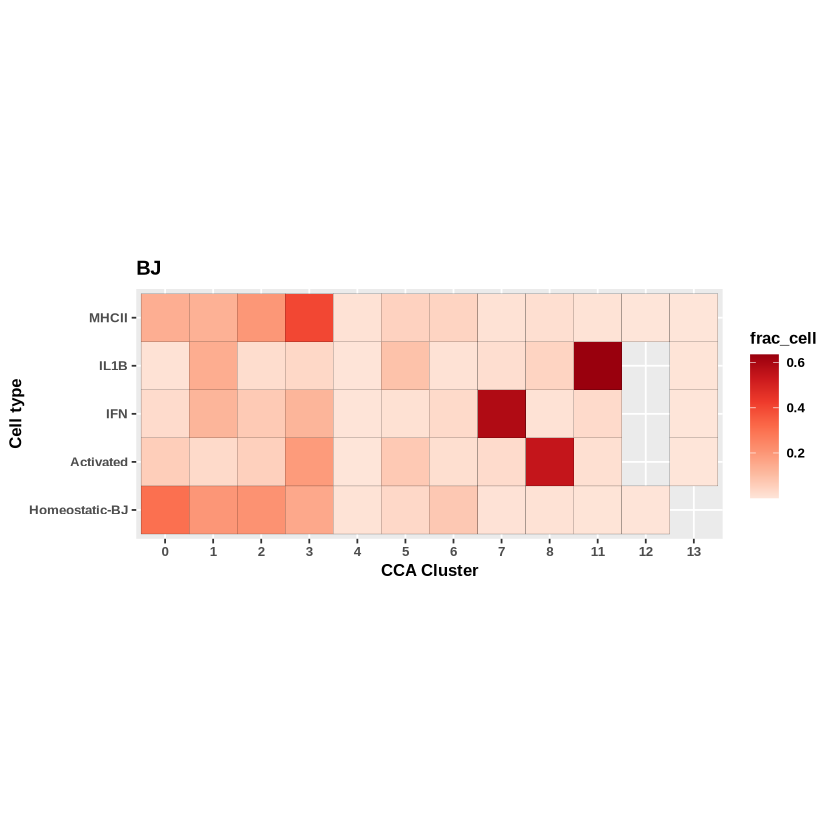

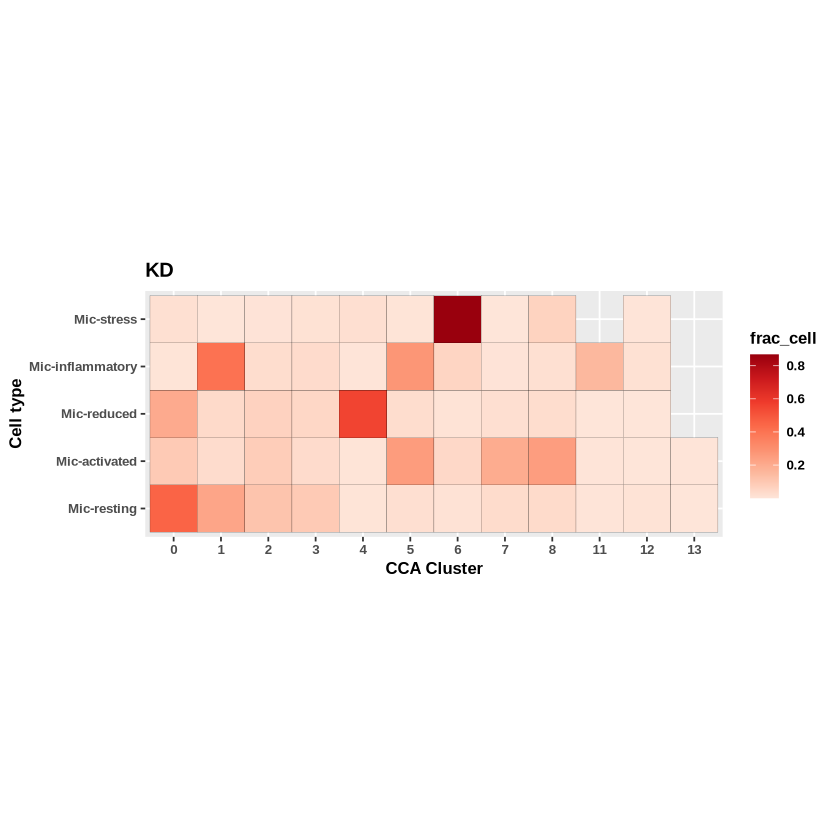

$BJ

$KD

$MD

$ROSMAP_MIT


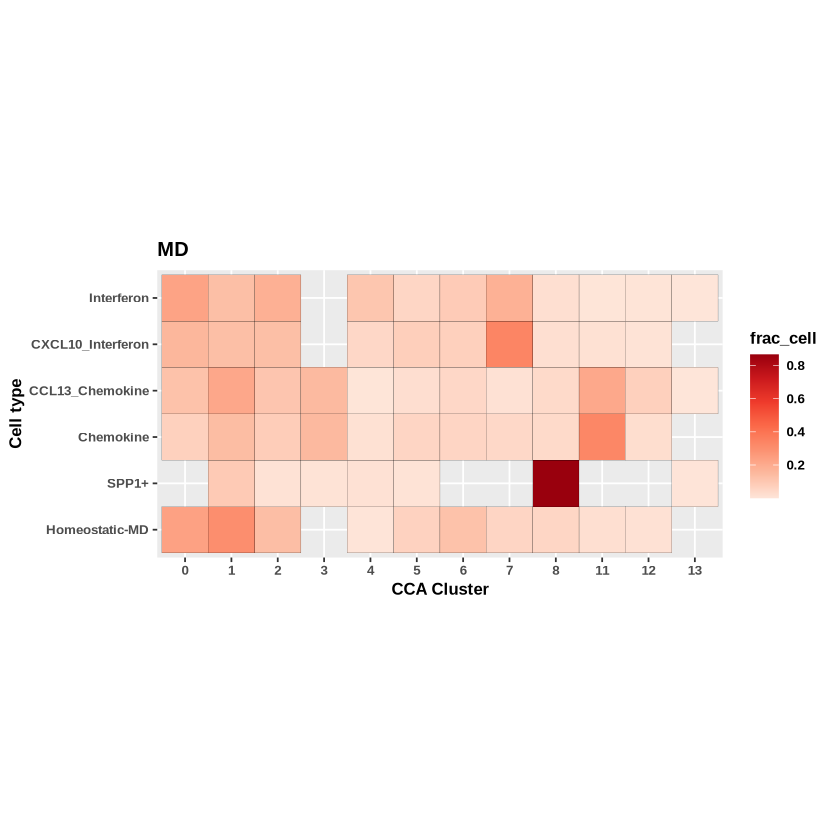

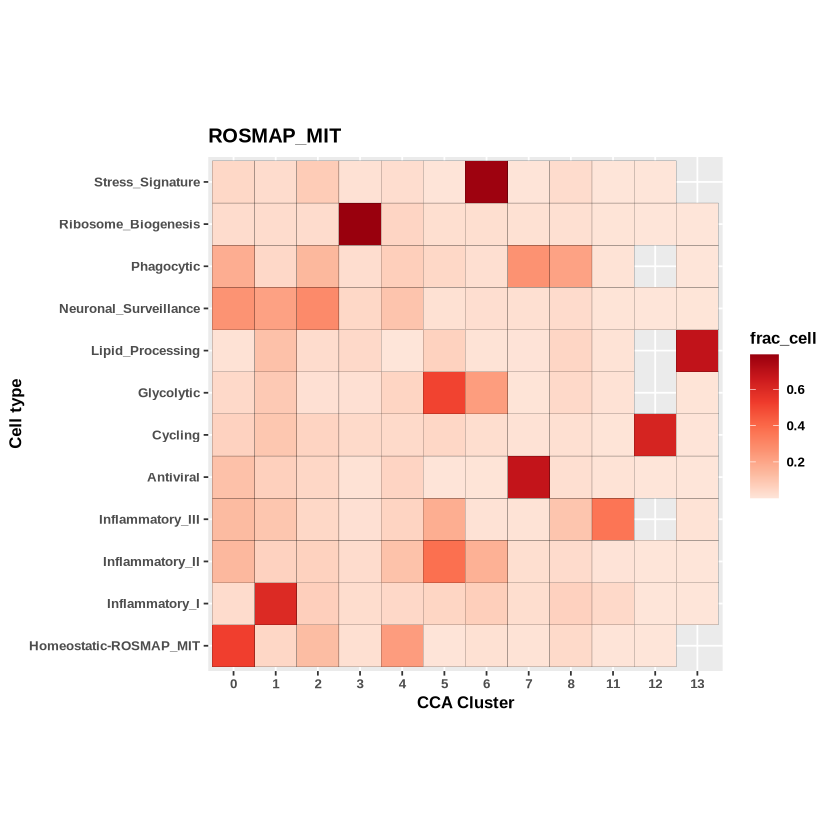

In [150]:
# cell proportion in aech cluster
sobj_new@meta.data %>%
    split(.$batch) %>%
    # .[3] %>%
    lapply(function(i) {
        i %>%
            count(cca_cluster, Cell_type) %>%
            mutate(cca_cluster = factor(cca_cluster, levels = 0:99)) %>%
            mutate(frac = n / sum(n)) %>% # % dataset
            # % of cell type
            group_by(Cell_type) %>%
            mutate(frac_cell = n / sum(n)) %>%
            ungroup() %>%
            # % cluster
            group_by(cca_cluster) %>%
            mutate(frac_clus = n / sum(n)) %>%
            ungroup() %>%
            ggplot(aes(
                y = Cell_type, x = cca_cluster,
                # fill= frac
                fill = frac_cell
                # fill= frac_clus
            )) +
            geom_tile() +
            scale_fill_distiller(palette = "Reds", direction = 1) +
            labs(title = unique(i$batch))+
    coord_fixed()+geom_tile(color = "black", lwd = 0.05)+
        theme(text = element_text(size = 10, face = "bold"))+
       xlab("CCA Cluster")+ylab("Cell type")
    })

In [92]:
Idents(sobj_new) <- "Integrated_cell_type"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


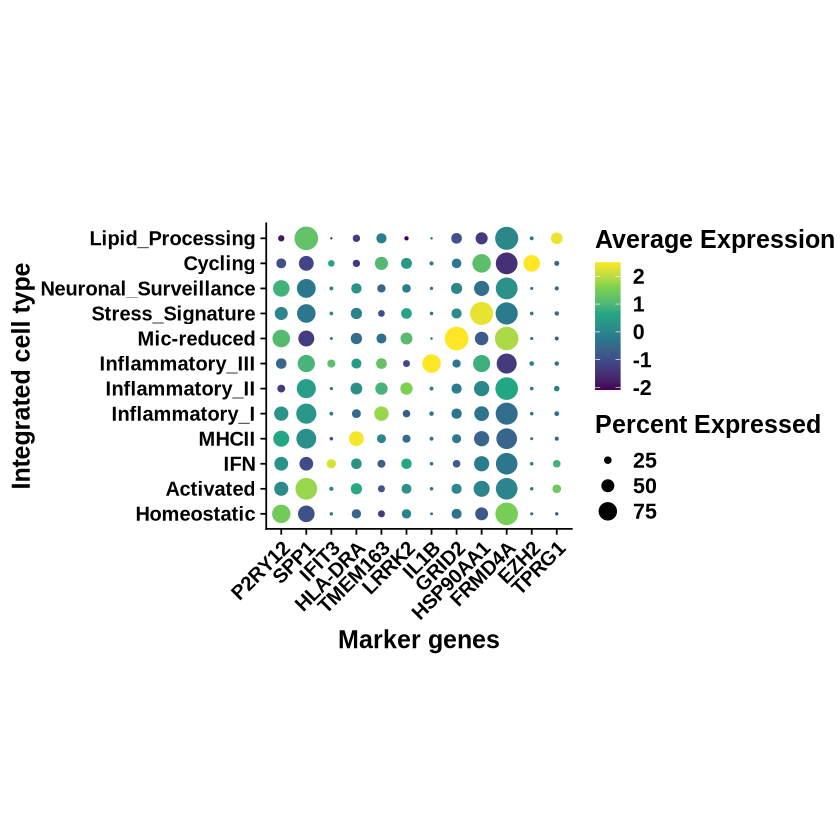

In [130]:
# Marker analysis
  homeostatic <- c("P2RY12")
 dam<- c("SPP1")
 ifn <- c("IFIT3")
 mhc <- c("HLA-DRA")
 inflammatory_I <- c("TMEM163")
 inflammatory_II<-c("LRRK2") 
 inflammatory_III <- c("IL1B") #IL1B
Mic_reduced <- ('GRID2')
Stress_sig <- c("HSP90AA1")
neuronal_surveillance <- c("FRMD4A")
cycling <- c("EZH2")
lipid_processing <- c("TPRG1")

 all_gene_list2 <- c(homeostatic,dam,ifn, mhc, inflammatory_I, 
 inflammatory_II,inflammatory_III,
 Mic_reduced,Stress_sig, neuronal_surveillance,
 cycling,lipid_processing
                    )
 p <- DotPlot(object = sobj_new, features = unique(all_gene_list2))+ RotatedAxis()+ scale_color_viridis_c()+coord_flip()


 p$data$id <- factor(p$data$id, levels = c("Homeostatic","Activated","IFN","MHCII","Inflammatory_I",
 "Inflammatory_II","Inflammatory_III","Mic-reduced","Stress_Signature",
 "Neuronal_Surveillance","Cycling","Lipid_Processing"))

p <- p + labs(title = "")+ coord_fixed()+
theme(text = element_text(size = 12, face = "bold"))+
xlab("Marker genes")+ylab("Integrated cell type")+
theme(text = element_text(size = 15)) 
p
ggsave(plot = p,"dotplot_marker_afterinter_celltype.png", height = 10, width = 9)

Indepth analysis of cluster 9,10 

In [48]:
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta.qs", nthreads = 6)

In [51]:
cluster_9_10 <- subset(sobj_new, subset = cca_cluster == c(9,10))

In [54]:
cluster_9_10$cca_cluster <- droplevels(cluster_9_10$cca_cluster)
table(cluster_9_10$cca_cluster)


  10    9 
2736 3340 

In [49]:
cluster_9 <- subset(sobj_new, subset = cca_cluster == 9)
cluster_10 <- subset(sobj_new, subset = cca_cluster == 10)

In [5]:
Idents(sobj_new) <- "cca_cluster"

In [50]:
table(sobj_new@meta.data$cca_cluster)


    0     1    10    11    12    13     2     3     4     5     6     7     8 
46705 35571  5572  4201  1723  1479 26385 21832 19277 15017 14814 12018 11542 
    9 
 6686 

In [11]:
colnames(sobj_new@meta.data)

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "dataset"               "Sample.ID"             "batch"                
 [7] "Cell_type"             "RNA_snn_res.1"         "seurat_clusters"      
[10] "percent.rbs"           "Gender"                "PMI"                  
[13] "AOD"                   "Status"                "nAPOE"                
[16] "ADAD"                  "clusters_data"         "brainRegion"          
[19] "age_death"             "msex"                  "pmi"                  
[22] "ADdiag3types"          "nCount_SCT"            "nFeature_SCT"         
[25] "unintegrated_clusters" "barcode"               "cca_cluster"          
[28] "percent.mt"            "percent.ribo"

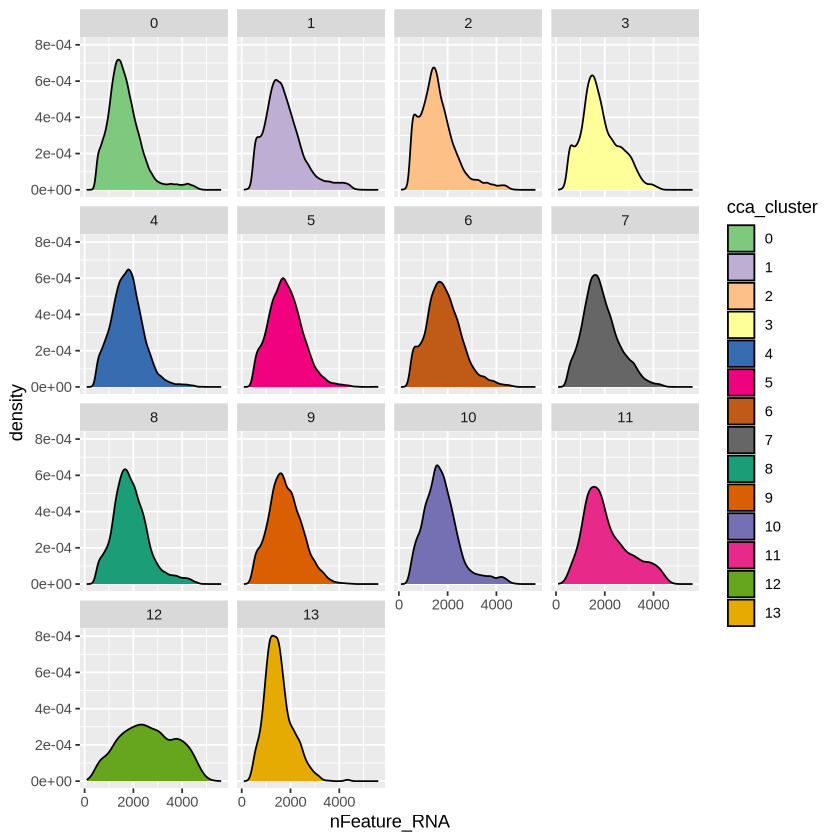

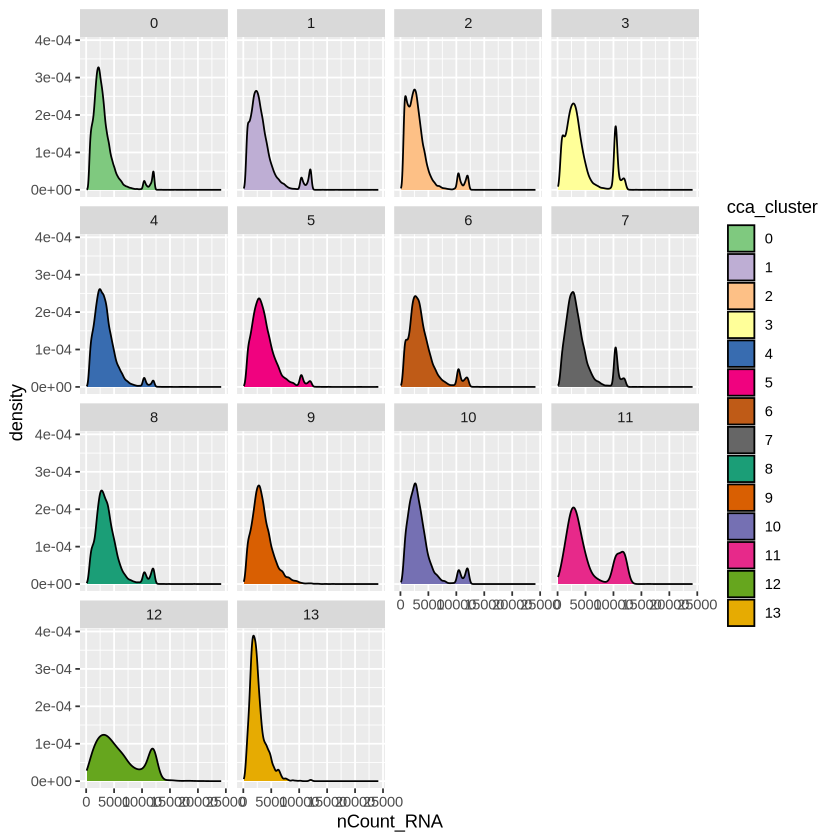

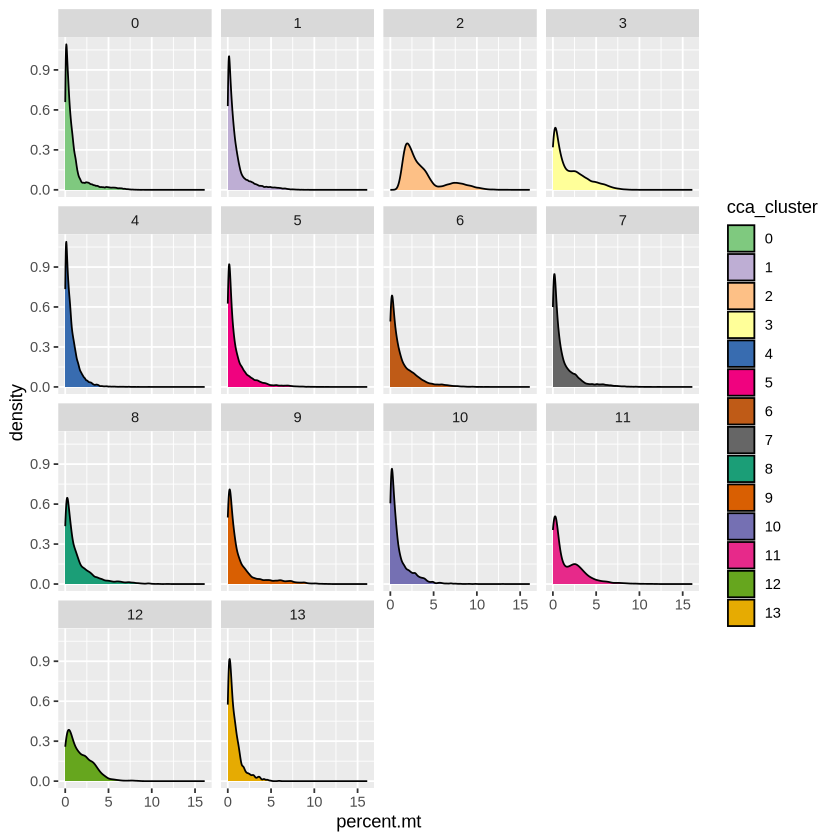

In [33]:
p1 <- sobj_new@meta.data %>% 
  ggplot(aes(x = nFeature_RNA, fill = cca_cluster)) +
  geom_density() +
  scale_fill_manual(values=col_vector[c(1:14)])+
  facet_wrap(~ cca_cluster)
p1$data$cca_cluster <- factor(x = p1$data$cca_cluster, levels = 0:13)
p1

p2 <- sobj_new@meta.data %>% 
  ggplot(aes(x = nCount_RNA, fill = cca_cluster)) +
  geom_density() +
  scale_fill_manual(values=col_vector[c(1:14)])+
  facet_wrap(~ cca_cluster)
p2$data$cca_cluster <- factor(x = p2$data$cca_cluster, levels = 0:13)
p2

p3 <- sobj_new@meta.data %>% 
  ggplot(aes(x = percent.mt, fill = cca_cluster)) +
  geom_density() +
  scale_fill_manual(values=col_vector[c(1:14)])+
  facet_wrap(~ cca_cluster)
p3$data$cca_cluster <- factor(x = p3$data$cca_cluster, levels = 0:13)
p3

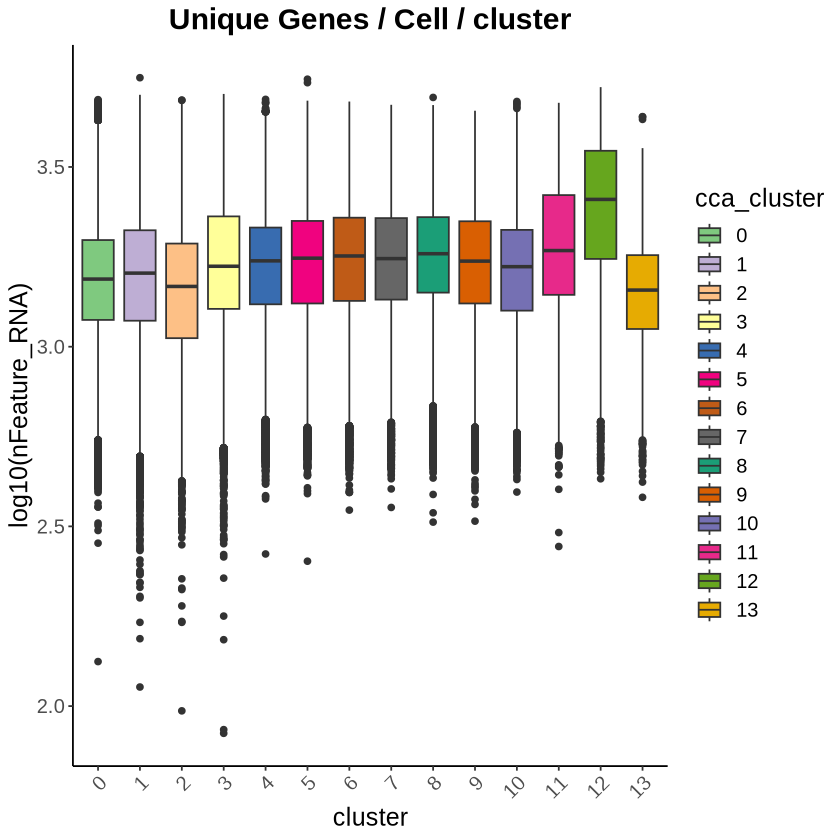

In [26]:
b1 <- ggplot(sobj_new@meta.data,
       aes(x = cca_cluster, 
           y = log10(nFeature_RNA), 
           fill=cca_cluster)) + 
  geom_boxplot() + 
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  theme(plot.title = element_text(hjust = 0.5, face="bold")) +
  ggtitle("Unique Genes / Cell / cluster") +
  scale_color_manual(values=col_vector[c(1:14)])+
  scale_fill_manual(values=col_vector[c(1:14)])+
  xlab("cluster")

b1$data$cca_cluster <- factor(x = b1$data$cca_cluster, levels = 0:13)
b1+theme(text = element_text(size = 15)) 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


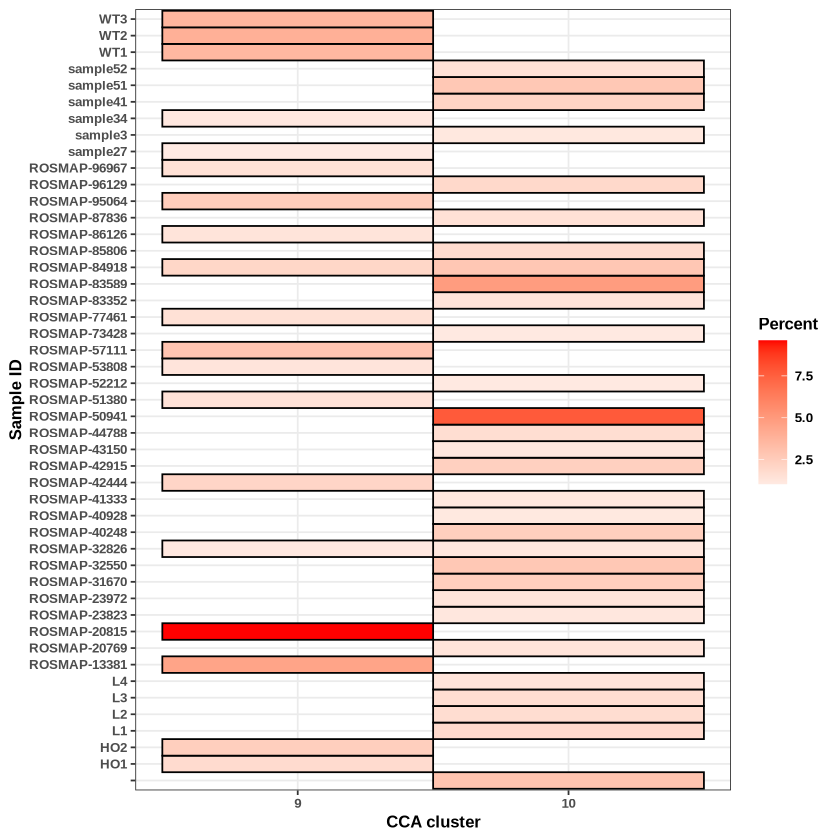

In [99]:
data <- table(cluster_9_10$cca_cluster, cluster_9_10$Sample.ID) %>%  as.data.frame() %>% group_by(Var1) %>% 
mutate(frac = Freq / sum(Freq)*100) %>% ungroup()  %>%
mutate(Percent = case_when(frac <1 ~ 0, T ~ frac))%>%
filter(Percent>0) 
p <- data %>% ggplot(aes(x = Var2, y = Var1, fill = Percent)) +   geom_tile() +  scale_fill_viridis()+
scale_fill_distiller(palette = "Reds", direction = 1, limits = c(0,100)) + xlab("Sample ID")+ylab("CCA cluster")+ scale_fill_gradient2(low = "white", high = "red")+
coord_fixed()+geom_tile(color = "black", lwd = 0.5)+theme_bw()+coord_flip()+ theme(text = element_text(size = 10, face = "bold"))
p$data$Var1 <- factor(x = p$data$Var1, levels = c(9,10))
p

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


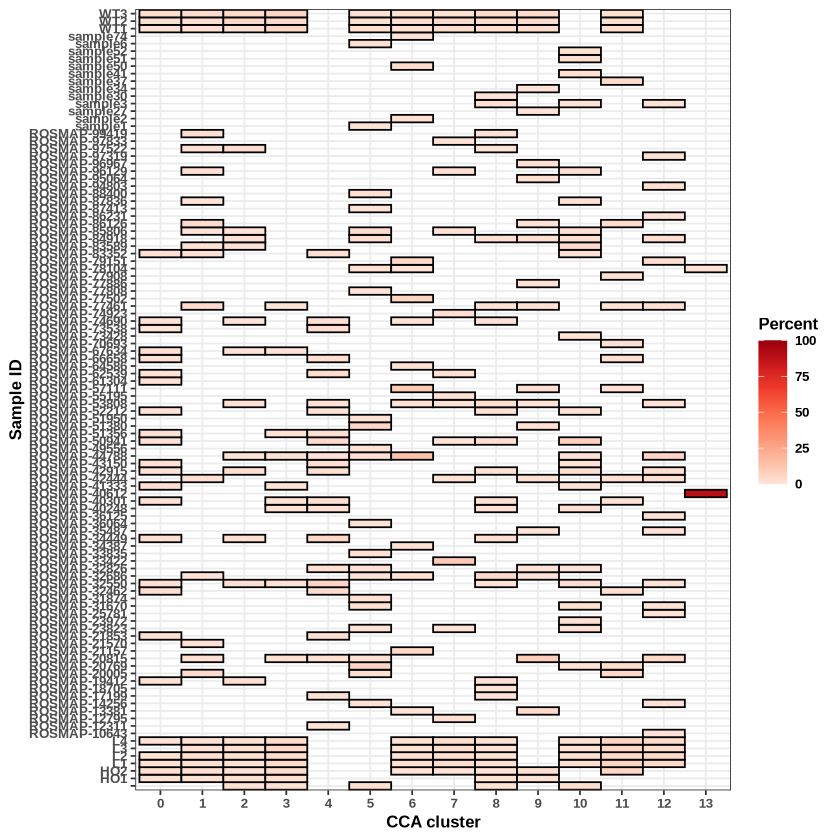

In [100]:
data <- table(sobj_new$cca_cluster, sobj_new$Sample.ID) %>%  as.data.frame() %>% group_by(Var1) %>% 
mutate(frac = Freq / sum(Freq)*100) %>% ungroup()  %>%
mutate(Percent = case_when(frac <1 ~ 0, T ~ frac))%>%
filter(Percent>0) 
p <- data %>% ggplot(aes(x = Var2, y = Var1, fill = Percent)) +   geom_tile() +  scale_fill_viridis()+
scale_fill_distiller(palette = "Reds", direction = 1, limits = c(0,100)) + xlab("Sample ID")+ylab("CCA cluster")+
coord_fixed()+geom_tile(color = "black", lwd = 0.5)+theme_bw()+coord_flip()+ theme(text = element_text(size = 10, face = "bold"))
p$data$Var1 <- factor(x = p$data$Var1, levels = 0:13)
p
#ggsave(plot = p,"check.png", height = 10, width = 9)